In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

  Using cached tensorflow_gpu-1.15.0-cp37-cp37m-win_amd64.whl (294.5 MB)
  Using cached tensorflow-1.15.0-cp37-cp37m-win_amd64.whl (295.1 MB)
  Using cached stable_baselines-2.10.2-py3-none-any.whl (240 kB)
  Using cached gym_anytrading-1.2.0-py3-none-any.whl (171 kB)
  Using cached gym-0.21.0-py3-none-any.whl
  Using cached grpcio-1.43.0-cp37-cp37m-win_amd64.whl (3.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wrapt-1.13.3-cp37-cp37m-win_amd64.whl (34 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-1.15.0-py3-none-any.whl (3.8 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached protobuf-3.19.1-cp37-cp37m-win_amd64.whl (896 kB)
  Using cached Keras_Applications-1.0

In [1]:
from platform import python_version

print(python_version())

3.7.11


In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

print("finished juicing")

finished juicing


In [3]:
gmedata = pd.read_csv('data/gmedata.csv')
apldata = pd.read_csv('data/apldata.csv')
microsoftdata = pd.read_csv('data/microsoftdata.csv')
tsladata = pd.read_csv('data/tsladata.csv')

# GME

In [19]:
gmedata.head()

,Date,Open,High,Low,Close,Volume
0,01/07/2022,159.77,160.31,132.50,140.62,"12,137,310"
1,01/06/2022,132.84,137.70,121.14,131.03,"6,051,480"
2,01/05/2022,148.39,148.85,129.15,129.37,"3,396,400"
3,01/04/2022,152.17,152.99,143.05,148.91,"1,834,894"
4,01/03/2022,149.23,159.38,149.21,152.84,"1,417,001"


In [20]:
gmedata['Date'] = pd.to_datetime(gmedata['Date'])
gmedata.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [21]:
gmedata.set_index('Date', inplace=True)
gmedata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-07,159.77,160.31,132.50,140.62,"12,137,310"
2022-01-06,132.84,137.70,121.14,131.03,"6,051,480"
2022-01-05,148.39,148.85,129.15,129.37,"3,396,400"
2022-01-04,152.17,152.99,143.05,148.91,"1,834,894"
2022-01-03,149.23,159.38,149.21,152.84,"1,417,001"


In [23]:
env_maker = lambda: gym.make('stocks-v0', df=gmedata, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [24]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -303     |
| fps                | 8        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000164 |
---------------------------------
---------------------------------
| explained_variance | -0.0925  |
| fps                | 356      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 14.8     |
---------------------------------
---------------------------------
| explained_variance | -5.64    |
| fps                | 435     

---------------------------------
| explained_variance | 0.00146  |
| fps                | 622      |
| nupdates           | 1700     |
| policy_entropy     | 0.67     |
| total_timesteps    | 8500     |
| value_loss         | 163      |
---------------------------------
---------------------------------
| explained_variance | -0.00759 |
| fps                | 625      |
| nupdates           | 1800     |
| policy_entropy     | 0.63     |
| total_timesteps    | 9000     |
| value_loss         | 25.2     |
---------------------------------
---------------------------------
| explained_variance | 0.039    |
| fps                | 627      |
| nupdates           | 1900     |
| policy_entropy     | 0.687    |
| total_timesteps    | 9500     |
| value_loss         | 28.9     |
---------------------------------
---------------------------------
| explained_variance | -0.00842 |
| fps                | 630      |
| nupdates           | 2000     |
| policy_entropy     | 0.623    |
| total_timest

---------------------------------
| explained_variance | -12      |
| fps                | 634      |
| nupdates           | 4800     |
| policy_entropy     | 0.477    |
| total_timesteps    | 24000    |
| value_loss         | 0.00105  |
---------------------------------
---------------------------------
| explained_variance | -0.00163 |
| fps                | 633      |
| nupdates           | 4900     |
| policy_entropy     | 0.641    |
| total_timesteps    | 24500    |
| value_loss         | 76.8     |
---------------------------------
---------------------------------
| explained_variance | 0.00317  |
| fps                | 632      |
| nupdates           | 5000     |
| policy_entropy     | 0.638    |
| total_timesteps    | 25000    |
| value_loss         | 9.49     |
---------------------------------
---------------------------------
| explained_variance | 0.0318   |
| fps                | 630      |
| nupdates           | 5100     |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | -0.00424 |
| fps                | 622      |
| nupdates           | 7900     |
| policy_entropy     | 0.678    |
| total_timesteps    | 39500    |
| value_loss         | 57.8     |
---------------------------------
---------------------------------
| explained_variance | 0.0511   |
| fps                | 621      |
| nupdates           | 8000     |
| policy_entropy     | 0.659    |
| total_timesteps    | 40000    |
| value_loss         | 5.83     |
---------------------------------
---------------------------------
| explained_variance | -0.00981 |
| fps                | 621      |
| nupdates           | 8100     |
| policy_entropy     | 0.691    |
| total_timesteps    | 40500    |
| value_loss         | 134      |
---------------------------------
---------------------------------
| explained_variance | -0.0253  |
| fps                | 621      |
| nupdates           | 8200     |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | 0.02     |
| fps                | 630      |
| nupdates           | 11000    |
| policy_entropy     | 0.328    |
| total_timesteps    | 55000    |
| value_loss         | 44.3     |
---------------------------------
---------------------------------
| explained_variance | 0.032    |
| fps                | 630      |
| nupdates           | 11100    |
| policy_entropy     | 0.512    |
| total_timesteps    | 55500    |
| value_loss         | 17.7     |
---------------------------------
---------------------------------
| explained_variance | -0.0501  |
| fps                | 630      |
| nupdates           | 11200    |
| policy_entropy     | 0.274    |
| total_timesteps    | 56000    |
| value_loss         | 0.00151  |
---------------------------------
---------------------------------
| explained_variance | -8.6     |
| fps                | 630      |
| nupdates           | 11300    |
| policy_entropy     | 0.153    |
| total_timest

---------------------------------
| explained_variance | -0.166   |
| fps                | 631      |
| nupdates           | 14100    |
| policy_entropy     | 0.192    |
| total_timesteps    | 70500    |
| value_loss         | 1.77e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.262   |
| fps                | 631      |
| nupdates           | 14200    |
| policy_entropy     | 0.345    |
| total_timesteps    | 71000    |
| value_loss         | 23.7     |
---------------------------------
---------------------------------
| explained_variance | -1.22    |
| fps                | 631      |
| nupdates           | 14300    |
| policy_entropy     | 0.0869   |
| total_timesteps    | 71500    |
| value_loss         | 0.68     |
---------------------------------
---------------------------------
| explained_variance | -2.75    |
| fps                | 631      |
| nupdates           | 14400    |
| policy_entropy     | 0.101    |
| total_timest

---------------------------------
| explained_variance | -21      |
| fps                | 628      |
| nupdates           | 17200    |
| policy_entropy     | 0.317    |
| total_timesteps    | 86000    |
| value_loss         | 0.000568 |
---------------------------------
---------------------------------
| explained_variance | -0.54    |
| fps                | 628      |
| nupdates           | 17300    |
| policy_entropy     | 0.432    |
| total_timesteps    | 86500    |
| value_loss         | 8.37e-05 |
---------------------------------
---------------------------------
| explained_variance | -2.64    |
| fps                | 628      |
| nupdates           | 17400    |
| policy_entropy     | 0.408    |
| total_timesteps    | 87000    |
| value_loss         | 0.00224  |
---------------------------------
---------------------------------
| explained_variance | -0.384   |
| fps                | 627      |
| nupdates           | 17500    |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -0.674   |
| fps                | 619      |
| nupdates           | 20300    |
| policy_entropy     | 0.691    |
| total_timesteps    | 101500   |
| value_loss         | 0.000585 |
---------------------------------
---------------------------------
| explained_variance | 0.0534   |
| fps                | 620      |
| nupdates           | 20400    |
| policy_entropy     | 0.69     |
| total_timesteps    | 102000   |
| value_loss         | 1.65     |
---------------------------------
---------------------------------
| explained_variance | -571     |
| fps                | 620      |
| nupdates           | 20500    |
| policy_entropy     | 0.672    |
| total_timesteps    | 102500   |
| value_loss         | 1.36e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.000515 |
| fps                | 620      |
| nupdates           | 20600    |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 0.112    |
| fps                | 612      |
| nupdates           | 23400    |
| policy_entropy     | 0.645    |
| total_timesteps    | 117000   |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | -0.00114 |
| fps                | 612      |
| nupdates           | 23500    |
| policy_entropy     | 0.674    |
| total_timesteps    | 117500   |
| value_loss         | 1.1e+03  |
---------------------------------
----------------------------------
| explained_variance | -0.000109 |
| fps                | 612       |
| nupdates           | 23600     |
| policy_entropy     | 0.674     |
| total_timesteps    | 118000    |
| value_loss         | 445       |
----------------------------------
---------------------------------
| explained_variance | 0.000309 |
| fps                | 612      |
| nupdates           | 23700    |
| policy_entropy     | 0.629    |
| tota

---------------------------------
| explained_variance | 0.000268 |
| fps                | 618      |
| nupdates           | 26500    |
| policy_entropy     | 0.693    |
| total_timesteps    | 132500   |
| value_loss         | 83.3     |
---------------------------------
---------------------------------
| explained_variance | -0.0143  |
| fps                | 618      |
| nupdates           | 26600    |
| policy_entropy     | 0.689    |
| total_timesteps    | 133000   |
| value_loss         | 98.2     |
---------------------------------
---------------------------------
| explained_variance | 0.000253 |
| fps                | 618      |
| nupdates           | 26700    |
| policy_entropy     | 0.692    |
| total_timesteps    | 133500   |
| value_loss         | 63.5     |
---------------------------------
---------------------------------
| explained_variance | 0.00061  |
| fps                | 618      |
| nupdates           | 26800    |
| policy_entropy     | 0.679    |
| total_timest

---------------------------------
| explained_variance | 0.101    |
| fps                | 621      |
| nupdates           | 29600    |
| policy_entropy     | 0.681    |
| total_timesteps    | 148000   |
| value_loss         | 0.00272  |
---------------------------------
---------------------------------
| explained_variance | 0.000329 |
| fps                | 621      |
| nupdates           | 29700    |
| policy_entropy     | 0.688    |
| total_timesteps    | 148500   |
| value_loss         | 2.12     |
---------------------------------
---------------------------------
| explained_variance | -0.00586 |
| fps                | 621      |
| nupdates           | 29800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 149000   |
| value_loss         | 83.9     |
---------------------------------
---------------------------------
| explained_variance | -0.00647 |
| fps                | 621      |
| nupdates           | 29900    |
| policy_entropy     | 0.682    |
| total_timest

---------------------------------
| explained_variance | 0.746    |
| fps                | 622      |
| nupdates           | 32600    |
| policy_entropy     | 0.601    |
| total_timesteps    | 163000   |
| value_loss         | 0.00476  |
---------------------------------
---------------------------------
| explained_variance | -1.1e-05 |
| fps                | 623      |
| nupdates           | 32700    |
| policy_entropy     | 0.575    |
| total_timesteps    | 163500   |
| value_loss         | 577      |
---------------------------------
---------------------------------
| explained_variance | -1.35    |
| fps                | 623      |
| nupdates           | 32800    |
| policy_entropy     | 0.583    |
| total_timesteps    | 164000   |
| value_loss         | 8.82e-05 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 623      |
| nupdates           | 32900    |
| policy_entropy     | 0.638    |
| total_timest

----------------------------------
| explained_variance | -0.000104 |
| fps                | 625       |
| nupdates           | 35600     |
| policy_entropy     | 0.687     |
| total_timesteps    | 178000    |
| value_loss         | 38.2      |
----------------------------------
----------------------------------
| explained_variance | -2.81e-05 |
| fps                | 625       |
| nupdates           | 35700     |
| policy_entropy     | 0.692     |
| total_timesteps    | 178500    |
| value_loss         | 57.7      |
----------------------------------
---------------------------------
| explained_variance | 0.0327   |
| fps                | 625      |
| nupdates           | 35800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 179000   |
| value_loss         | 0.00173  |
---------------------------------
---------------------------------
| explained_variance | 7.1e-05  |
| fps                | 625      |
| nupdates           | 35900    |
| policy_entropy     | 0.691    

---------------------------------
| explained_variance | -0.023   |
| fps                | 626      |
| nupdates           | 38600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 193000   |
| value_loss         | 0.00146  |
---------------------------------
---------------------------------
| explained_variance | 9.97e-05 |
| fps                | 626      |
| nupdates           | 38700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 193500   |
| value_loss         | 6.97     |
---------------------------------
---------------------------------
| explained_variance | 0.000193 |
| fps                | 626      |
| nupdates           | 38800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 194000   |
| value_loss         | 2.02     |
---------------------------------
---------------------------------
| explained_variance | 1.42e-05 |
| fps                | 626      |
| nupdates           | 38900    |
| policy_entropy     | 0.692    |
| total_timest

----------------------------------
| explained_variance | -7.89e-05 |
| fps                | 629       |
| nupdates           | 41600     |
| policy_entropy     | 0.692     |
| total_timesteps    | 208000    |
| value_loss         | 31.9      |
----------------------------------
---------------------------------
| explained_variance | -0.00478 |
| fps                | 630      |
| nupdates           | 41700    |
| policy_entropy     | 0.692    |
| total_timesteps    | 208500   |
| value_loss         | 5.86     |
---------------------------------
---------------------------------
| explained_variance | 0.0176   |
| fps                | 630      |
| nupdates           | 41800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 209000   |
| value_loss         | 75.9     |
---------------------------------
---------------------------------
| explained_variance | 4.35e-05 |
| fps                | 630      |
| nupdates           | 41900    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 0.0024   |
| fps                | 631      |
| nupdates           | 44600    |
| policy_entropy     | 0.691    |
| total_timesteps    | 223000   |
| value_loss         | 0.0175   |
---------------------------------
----------------------------------
| explained_variance | -0.000243 |
| fps                | 631       |
| nupdates           | 44700     |
| policy_entropy     | 0.692     |
| total_timesteps    | 223500    |
| value_loss         | 3.58      |
----------------------------------
---------------------------------
| explained_variance | 3.84e-05 |
| fps                | 631      |
| nupdates           | 44800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 224000   |
| value_loss         | 36.6     |
---------------------------------
---------------------------------
| explained_variance | 3.22e-06 |
| fps                | 631      |
| nupdates           | 44900    |
| policy_entropy     | 0.691    |
| tota

---------------------------------
| explained_variance | 0.00649  |
| fps                | 632      |
| nupdates           | 47600    |
| policy_entropy     | 0.685    |
| total_timesteps    | 238000   |
| value_loss         | 0.00209  |
---------------------------------
----------------------------------
| explained_variance | -1.45e-05 |
| fps                | 632       |
| nupdates           | 47700     |
| policy_entropy     | 0.682     |
| total_timesteps    | 238500    |
| value_loss         | 122       |
----------------------------------
----------------------------------
| explained_variance | -2.34e-05 |
| fps                | 632       |
| nupdates           | 47800     |
| policy_entropy     | 0.68      |
| total_timesteps    | 239000    |
| value_loss         | 9.27      |
----------------------------------
---------------------------------
| explained_variance | 0.00105  |
| fps                | 633      |
| nupdates           | 47900    |
| policy_entropy     | 0.682    

----------------------------------
| explained_variance | -2.62e-06 |
| fps                | 634       |
| nupdates           | 50600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 253000    |
| value_loss         | 345       |
----------------------------------
----------------------------------
| explained_variance | -2.56e-05 |
| fps                | 634       |
| nupdates           | 50700     |
| policy_entropy     | 0.693     |
| total_timesteps    | 253500    |
| value_loss         | 88.5      |
----------------------------------
---------------------------------
| explained_variance | 0.00566  |
| fps                | 634      |
| nupdates           | 50800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 254000   |
| value_loss         | 6.37     |
---------------------------------
----------------------------------
| explained_variance | -0.000697 |
| fps                | 634       |
| nupdates           | 50900     |
| policy_entropy     | 0.692

----------------------------------
| explained_variance | -4.25e+03 |
| fps                | 634       |
| nupdates           | 53600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 268000    |
| value_loss         | 1.4       |
----------------------------------
----------------------------------
| explained_variance | -4.28e-05 |
| fps                | 634       |
| nupdates           | 53700     |
| policy_entropy     | 0.693     |
| total_timesteps    | 268500    |
| value_loss         | 10.5      |
----------------------------------
---------------------------------
| explained_variance | 0.00109  |
| fps                | 634      |
| nupdates           | 53800    |
| policy_entropy     | 0.691    |
| total_timesteps    | 269000   |
| value_loss         | 0.0106   |
---------------------------------
---------------------------------
| explained_variance | -1.24    |
| fps                | 634      |
| nupdates           | 53900    |
| policy_entropy     | 0.684    

----------------------------------
| explained_variance | -1.56e-05 |
| fps                | 634       |
| nupdates           | 56600     |
| policy_entropy     | 0.684     |
| total_timesteps    | 283000    |
| value_loss         | 76.9      |
----------------------------------
---------------------------------
| explained_variance | 1.57e-05 |
| fps                | 634      |
| nupdates           | 56700    |
| policy_entropy     | 0.688    |
| total_timesteps    | 283500   |
| value_loss         | 43.1     |
---------------------------------
----------------------------------
| explained_variance | -1.84e-05 |
| fps                | 634       |
| nupdates           | 56800     |
| policy_entropy     | 0.69      |
| total_timesteps    | 284000    |
| value_loss         | 41.7      |
----------------------------------
---------------------------------
| explained_variance | 0.000116 |
| fps                | 634      |
| nupdates           | 56900    |
| policy_entropy     | 0.688    

----------------------------------
| explained_variance | -0.000318 |
| fps                | 635       |
| nupdates           | 59600     |
| policy_entropy     | 0.691     |
| total_timesteps    | 298000    |
| value_loss         | 199       |
----------------------------------
----------------------------------
| explained_variance | -1.24e-05 |
| fps                | 635       |
| nupdates           | 59700     |
| policy_entropy     | 0.69      |
| total_timesteps    | 298500    |
| value_loss         | 19.8      |
----------------------------------
---------------------------------
| explained_variance | 7.87e-06 |
| fps                | 635      |
| nupdates           | 59800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 299000   |
| value_loss         | 50.4     |
---------------------------------
---------------------------------
| explained_variance | 0.00553  |
| fps                | 635      |
| nupdates           | 59900    |
| policy_entropy     | 0.692    

----------------------------------
| explained_variance | -8.48e-05 |
| fps                | 636       |
| nupdates           | 62600     |
| policy_entropy     | 0.679     |
| total_timesteps    | 313000    |
| value_loss         | 3.81      |
----------------------------------
----------------------------------
| explained_variance | -0.000239 |
| fps                | 636       |
| nupdates           | 62700     |
| policy_entropy     | 0.687     |
| total_timesteps    | 313500    |
| value_loss         | 8.78      |
----------------------------------
---------------------------------
| explained_variance | 7.75e-06 |
| fps                | 636      |
| nupdates           | 62800    |
| policy_entropy     | 0.687    |
| total_timesteps    | 314000   |
| value_loss         | 128      |
---------------------------------
---------------------------------
| explained_variance | 8.82e-06 |
| fps                | 636      |
| nupdates           | 62900    |
| policy_entropy     | 0.688    

---------------------------------
| explained_variance | 1.76e-05 |
| fps                | 636      |
| nupdates           | 65600    |
| policy_entropy     | 0.642    |
| total_timesteps    | 328000   |
| value_loss         | 38.9     |
---------------------------------
---------------------------------
| explained_variance | 0.00049  |
| fps                | 636      |
| nupdates           | 65700    |
| policy_entropy     | 0.649    |
| total_timesteps    | 328500   |
| value_loss         | 0.0358   |
---------------------------------
----------------------------------
| explained_variance | -5.25e-06 |
| fps                | 636       |
| nupdates           | 65800     |
| policy_entropy     | 0.659     |
| total_timesteps    | 329000    |
| value_loss         | 857       |
----------------------------------
----------------------------------
| explained_variance | -1.75e-05 |
| fps                | 636       |
| nupdates           | 65900     |
| policy_entropy     | 0.655     |
|

---------------------------------
| explained_variance | 8.76e-06 |
| fps                | 636      |
| nupdates           | 68600    |
| policy_entropy     | 0.686    |
| total_timesteps    | 343000   |
| value_loss         | 48.6     |
---------------------------------
---------------------------------
| explained_variance | -2.5e-06 |
| fps                | 636      |
| nupdates           | 68700    |
| policy_entropy     | 0.685    |
| total_timesteps    | 343500   |
| value_loss         | 157      |
---------------------------------
---------------------------------
| explained_variance | 7.25e-05 |
| fps                | 636      |
| nupdates           | 68800    |
| policy_entropy     | 0.688    |
| total_timesteps    | 344000   |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 1.73e-06 |
| fps                | 636      |
| nupdates           | 68900    |
| policy_entropy     | 0.691    |
| total_timest

---------------------------------
| explained_variance | 1.79e-06 |
| fps                | 637      |
| nupdates           | 71600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 358000   |
| value_loss         | 798      |
---------------------------------
---------------------------------
| explained_variance | 0.0024   |
| fps                | 637      |
| nupdates           | 71700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 358500   |
| value_loss         | 0.00207  |
---------------------------------
---------------------------------
| explained_variance | 4.17e-06 |
| fps                | 637      |
| nupdates           | 71800    |
| policy_entropy     | 0.692    |
| total_timesteps    | 359000   |
| value_loss         | 91.5     |
---------------------------------
---------------------------------
| explained_variance | 1.43e-06 |
| fps                | 637      |
| nupdates           | 71900    |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.0437   |
| fps                | 637      |
| nupdates           | 74600    |
| policy_entropy     | 0.692    |
| total_timesteps    | 373000   |
| value_loss         | 1.3      |
---------------------------------
---------------------------------
| explained_variance | -0.00318 |
| fps                | 637      |
| nupdates           | 74700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 373500   |
| value_loss         | 0.00228  |
---------------------------------
----------------------------------
| explained_variance | -0.000248 |
| fps                | 637       |
| nupdates           | 74800     |
| policy_entropy     | 0.693     |
| total_timesteps    | 374000    |
| value_loss         | 0.0596    |
----------------------------------
---------------------------------
| explained_variance | -0.663   |
| fps                | 637      |
| nupdates           | 74900    |
| policy_entropy     | 0.689    |
| tota

----------------------------------
| explained_variance | -7.15e-07 |
| fps                | 638       |
| nupdates           | 77600     |
| policy_entropy     | 0.689     |
| total_timesteps    | 388000    |
| value_loss         | 35.7      |
----------------------------------
---------------------------------
| explained_variance | -0.00502 |
| fps                | 638      |
| nupdates           | 77700    |
| policy_entropy     | 0.688    |
| total_timesteps    | 388500   |
| value_loss         | 0.00296  |
---------------------------------
---------------------------------
| explained_variance | 0.00482  |
| fps                | 638      |
| nupdates           | 77800    |
| policy_entropy     | 0.69     |
| total_timesteps    | 389000   |
| value_loss         | 0.00297  |
---------------------------------
---------------------------------
| explained_variance | 1.08e-05 |
| fps                | 638      |
| nupdates           | 77900    |
| policy_entropy     | 0.683    |
| tota

---------------------------------
| explained_variance | 2.64e-05 |
| fps                | 638      |
| nupdates           | 80600    |
| policy_entropy     | 0.682    |
| total_timesteps    | 403000   |
| value_loss         | 36.1     |
---------------------------------
---------------------------------
| explained_variance | 8.95e-05 |
| fps                | 638      |
| nupdates           | 80700    |
| policy_entropy     | 0.676    |
| total_timesteps    | 403500   |
| value_loss         | 4.05     |
---------------------------------
---------------------------------
| explained_variance | 0.00471  |
| fps                | 638      |
| nupdates           | 80800    |
| policy_entropy     | 0.678    |
| total_timesteps    | 404000   |
| value_loss         | 0.00371  |
---------------------------------
---------------------------------
| explained_variance | 0.00467  |
| fps                | 638      |
| nupdates           | 80900    |
| policy_entropy     | 0.683    |
| total_timest

---------------------------------
| explained_variance | 1.57e-05 |
| fps                | 639      |
| nupdates           | 83600    |
| policy_entropy     | 0.693    |
| total_timesteps    | 418000   |
| value_loss         | 3.87     |
---------------------------------
---------------------------------
| explained_variance | 3.7e-06  |
| fps                | 639      |
| nupdates           | 83700    |
| policy_entropy     | 0.693    |
| total_timesteps    | 418500   |
| value_loss         | 109      |
---------------------------------
---------------------------------
| explained_variance | -0.00015 |
| fps                | 639      |
| nupdates           | 83800    |
| policy_entropy     | 0.693    |
| total_timesteps    | 419000   |
| value_loss         | 8.01     |
---------------------------------
----------------------------------
| explained_variance | -1.78e-05 |
| fps                | 639       |
| nupdates           | 83900     |
| policy_entropy     | 0.692     |
| total_t

----------------------------------
| explained_variance | -0.000974 |
| fps                | 639       |
| nupdates           | 86600     |
| policy_entropy     | 0.693     |
| total_timesteps    | 433000    |
| value_loss         | 19        |
----------------------------------
---------------------------------
| explained_variance | -0.00022 |
| fps                | 639      |
| nupdates           | 86700    |
| policy_entropy     | 0.691    |
| total_timesteps    | 433500   |
| value_loss         | 1.34     |
---------------------------------
---------------------------------
| explained_variance | -0.202   |
| fps                | 639      |
| nupdates           | 86800    |
| policy_entropy     | 0.67     |
| total_timesteps    | 434000   |
| value_loss         | 12.2     |
---------------------------------
---------------------------------
| explained_variance | 5.96e-07 |
| fps                | 639      |
| nupdates           | 86900    |
| policy_entropy     | 0.689    |
| tota

---------------------------------
| explained_variance | 3.51e-05 |
| fps                | 637      |
| nupdates           | 89600    |
| policy_entropy     | 0.664    |
| total_timesteps    | 448000   |
| value_loss         | 7.44     |
---------------------------------
---------------------------------
| explained_variance | 0.00324  |
| fps                | 637      |
| nupdates           | 89700    |
| policy_entropy     | 0.662    |
| total_timesteps    | 448500   |
| value_loss         | 0.00366  |
---------------------------------
---------------------------------
| explained_variance | 3.65e-05 |
| fps                | 637      |
| nupdates           | 89800    |
| policy_entropy     | 0.658    |
| total_timesteps    | 449000   |
| value_loss         | 61       |
---------------------------------
----------------------------------
| explained_variance | -1.44e-05 |
| fps                | 637       |
| nupdates           | 89900     |
| policy_entropy     | 0.663     |
| total_t

----------------------------------
| explained_variance | -7.67e-05 |
| fps                | 630       |
| nupdates           | 92600     |
| policy_entropy     | 0.679     |
| total_timesteps    | 463000    |
| value_loss         | 7.08      |
----------------------------------
---------------------------------
| explained_variance | -0.00113 |
| fps                | 630      |
| nupdates           | 92700    |
| policy_entropy     | 0.675    |
| total_timesteps    | 463500   |
| value_loss         | 0.0043   |
---------------------------------
----------------------------------
| explained_variance | -0.000448 |
| fps                | 630       |
| nupdates           | 92800     |
| policy_entropy     | 0.669     |
| total_timesteps    | 464000    |
| value_loss         | 0.201     |
----------------------------------
----------------------------------
| explained_variance | -8.34e-07 |
| fps                | 630       |
| nupdates           | 92900     |
| policy_entropy     | 0.665

---------------------------------
| explained_variance | -0.00337 |
| fps                | 627      |
| nupdates           | 95600    |
| policy_entropy     | 0.689    |
| total_timesteps    | 478000   |
| value_loss         | 41.6     |
---------------------------------


KeyboardInterrupt: 

In [25]:
env = gym.make('stocks-v0', df=gmedata, frame_bound=(110,140), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 6.499999999999972, 'total_profit': 0.9600356046862982, 'position': 0}


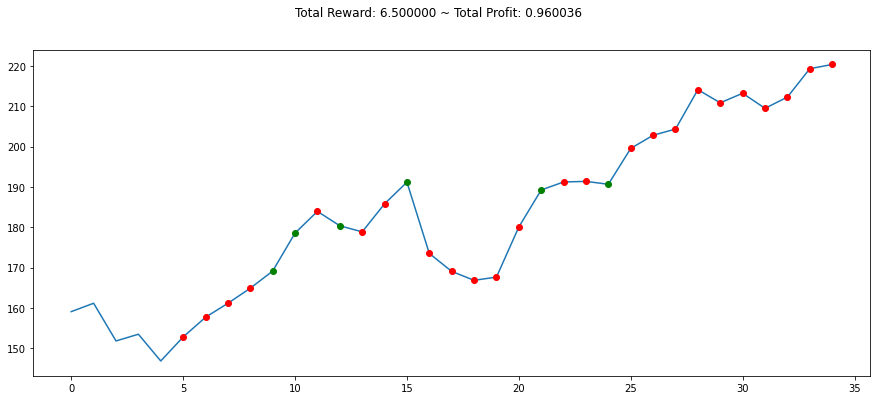

In [26]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# AAPL

In [7]:
apldata.head()

,Date,Open,High,Low,Close,Volume
0,01/07/2022,172.89,174.14,171.03,172.17,"86,709,148"
1,01/06/2022,172.70,175.30,171.64,172.00,"96,903,961"
2,01/05/2022,179.61,180.17,174.64,174.92,"94,537,602"
3,01/04/2022,182.63,182.94,179.12,179.70,"99,310,438"
4,01/03/2022,177.83,182.88,177.71,182.01,"104,701,203"


In [27]:
apldata['Date'] = pd.to_datetime(apldata['Date'])
apldata.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [28]:
apldata.set_index('Date', inplace=True)
apldata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-07,172.89,174.14,171.03,172.17,"86,709,148"
2022-01-06,172.70,175.30,171.64,172.00,"96,903,961"
2022-01-05,179.61,180.17,174.64,174.92,"94,537,602"
2022-01-04,182.63,182.94,179.12,179.70,"99,310,438"
2022-01-03,177.83,182.88,177.71,182.01,"104,701,203"


In [29]:
env_maker = lambda: gym.make('stocks-v0', df=apldata, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [30]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

---------------------------------
| explained_variance | 0.0674   |
| fps                | 21       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 12.7     |
---------------------------------
---------------------------------
| explained_variance | -0.0607  |
| fps                | 480      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 0.137    |
---------------------------------
---------------------------------
| explained_variance | 0.0276   |
| fps                | 548      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 0.118    |
---------------------------------
---------------------------------
| explained_variance | -3.57    |
| fps                | 566      |
| nupdates           | 300      |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -773     |
| fps                | 593      |
| nupdates           | 3100     |
| policy_entropy     | 0.00283  |
| total_timesteps    | 15500    |
| value_loss         | 1.59e-08 |
---------------------------------
---------------------------------
| explained_variance | -56.4    |
| fps                | 593      |
| nupdates           | 3200     |
| policy_entropy     | 0.00296  |
| total_timesteps    | 16000    |
| value_loss         | 6.96e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.657   |
| fps                | 593      |
| nupdates           | 3300     |
| policy_entropy     | 0.00527  |
| total_timesteps    | 16500    |
| value_loss         | 8.78e-05 |
---------------------------------
---------------------------------
| explained_variance | -1.46    |
| fps                | 593      |
| nupdates           | 3400     |
| policy_entropy     | 0.00557  |
| total_timest

---------------------------------
| explained_variance | -0.777   |
| fps                | 595      |
| nupdates           | 6200     |
| policy_entropy     | 0.00465  |
| total_timesteps    | 31000    |
| value_loss         | 1.76e-08 |
---------------------------------
----------------------------------
| explained_variance | -2.32e+03 |
| fps                | 595       |
| nupdates           | 6300      |
| policy_entropy     | 0.00575   |
| total_timesteps    | 31500     |
| value_loss         | 2.86e-06  |
----------------------------------
---------------------------------
| explained_variance | -0.748   |
| fps                | 596      |
| nupdates           | 6400     |
| policy_entropy     | 0.00149  |
| total_timesteps    | 32000    |
| value_loss         | 8.52e-08 |
---------------------------------
---------------------------------
| explained_variance | -1.93    |
| fps                | 596      |
| nupdates           | 6500     |
| policy_entropy     | 0.00153  |
| tota

---------------------------------
| explained_variance | -0.684   |
| fps                | 595      |
| nupdates           | 9300     |
| policy_entropy     | 0.0054   |
| total_timesteps    | 46500    |
| value_loss         | 6.46e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 595      |
| nupdates           | 9400     |
| policy_entropy     | 0.00582  |
| total_timesteps    | 47000    |
| value_loss         | 1.28e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.798   |
| fps                | 596      |
| nupdates           | 9500     |
| policy_entropy     | 0.00677  |
| total_timesteps    | 47500    |
| value_loss         | 3.74e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.901   |
| fps                | 596      |
| nupdates           | 9600     |
| policy_entropy     | 0.00739  |
| total_timest

---------------------------------
| explained_variance | -0.485   |
| fps                | 612      |
| nupdates           | 12400    |
| policy_entropy     | 0.00601  |
| total_timesteps    | 62000    |
| value_loss         | 1.15e-09 |
---------------------------------
---------------------------------
| explained_variance | -1.03    |
| fps                | 612      |
| nupdates           | 12500    |
| policy_entropy     | 0.00655  |
| total_timesteps    | 62500    |
| value_loss         | 3.7e-10  |
---------------------------------
---------------------------------
| explained_variance | 0.13     |
| fps                | 613      |
| nupdates           | 12600    |
| policy_entropy     | 0.00366  |
| total_timesteps    | 63000    |
| value_loss         | 1.14e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.4     |
| fps                | 613      |
| nupdates           | 12700    |
| policy_entropy     | 0.00385  |
| total_timest

---------------------------------
| explained_variance | -0.753   |
| fps                | 624      |
| nupdates           | 15500    |
| policy_entropy     | 0.000489 |
| total_timesteps    | 77500    |
| value_loss         | 2.97e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.444   |
| fps                | 625      |
| nupdates           | 15600    |
| policy_entropy     | 0.000498 |
| total_timesteps    | 78000    |
| value_loss         | 1.18e-09 |
---------------------------------
---------------------------------
| explained_variance | -17.9    |
| fps                | 625      |
| nupdates           | 15700    |
| policy_entropy     | 0.000738 |
| total_timesteps    | 78500    |
| value_loss         | 7.48e-07 |
---------------------------------
---------------------------------
| explained_variance | -2.2     |
| fps                | 626      |
| nupdates           | 15800    |
| policy_entropy     | 0.00052  |
| total_timest

---------------------------------
| explained_variance | -0.506   |
| fps                | 634      |
| nupdates           | 18600    |
| policy_entropy     | 0.00101  |
| total_timesteps    | 93000    |
| value_loss         | 1.47e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.63    |
| fps                | 634      |
| nupdates           | 18700    |
| policy_entropy     | 0.00104  |
| total_timesteps    | 93500    |
| value_loss         | 5.01e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 635      |
| nupdates           | 18800    |
| policy_entropy     | 0.00107  |
| total_timesteps    | 94000    |
| value_loss         | 1.18e-06 |
---------------------------------
---------------------------------
| explained_variance | 0.302    |
| fps                | 635      |
| nupdates           | 18900    |
| policy_entropy     | 0.00111  |
| total_timest

---------------------------------
| explained_variance | 0.809    |
| fps                | 641      |
| nupdates           | 21700    |
| policy_entropy     | 0.00318  |
| total_timesteps    | 108500   |
| value_loss         | 9.8e-09  |
---------------------------------
---------------------------------
| explained_variance | -0.613   |
| fps                | 642      |
| nupdates           | 21800    |
| policy_entropy     | 0.00344  |
| total_timesteps    | 109000   |
| value_loss         | 1.92e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.578   |
| fps                | 642      |
| nupdates           | 21900    |
| policy_entropy     | 0.00397  |
| total_timesteps    | 109500   |
| value_loss         | 3.03e-07 |
---------------------------------
---------------------------------
| explained_variance | -51.8    |
| fps                | 642      |
| nupdates           | 22000    |
| policy_entropy     | 0.00453  |
| total_timest

---------------------------------
| explained_variance | -229     |
| fps                | 647      |
| nupdates           | 24800    |
| policy_entropy     | 0.00217  |
| total_timesteps    | 124000   |
| value_loss         | 2.48e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.629   |
| fps                | 647      |
| nupdates           | 24900    |
| policy_entropy     | 0.00197  |
| total_timesteps    | 124500   |
| value_loss         | 5.91e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.605   |
| fps                | 647      |
| nupdates           | 25000    |
| policy_entropy     | 0.00551  |
| total_timesteps    | 125000   |
| value_loss         | 1.59e-05 |
---------------------------------
---------------------------------
| explained_variance | -6.53    |
| fps                | 648      |
| nupdates           | 25100    |
| policy_entropy     | 0.00234  |
| total_timest

---------------------------------
| explained_variance | 0.706    |
| fps                | 652      |
| nupdates           | 27900    |
| policy_entropy     | 0.133    |
| total_timesteps    | 139500   |
| value_loss         | 6.39e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.69    |
| fps                | 652      |
| nupdates           | 28000    |
| policy_entropy     | 0.00442  |
| total_timesteps    | 140000   |
| value_loss         | 9.52e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.636   |
| fps                | 652      |
| nupdates           | 28100    |
| policy_entropy     | 0.0207   |
| total_timesteps    | 140500   |
| value_loss         | 4.82e-06 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 652      |
| nupdates           | 28200    |
| policy_entropy     | 0.00876  |
| total_timest

---------------------------------
| explained_variance | -0.458   |
| fps                | 655      |
| nupdates           | 31000    |
| policy_entropy     | 0.000295 |
| total_timesteps    | 155000   |
| value_loss         | 7.56e-06 |
---------------------------------
---------------------------------
| explained_variance | -226     |
| fps                | 654      |
| nupdates           | 31100    |
| policy_entropy     | 0.000393 |
| total_timesteps    | 155500   |
| value_loss         | 0.000221 |
---------------------------------
---------------------------------
| explained_variance | -0.443   |
| fps                | 654      |
| nupdates           | 31200    |
| policy_entropy     | 0.000243 |
| total_timesteps    | 156000   |
| value_loss         | 5.19e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.589   |
| fps                | 654      |
| nupdates           | 31300    |
| policy_entropy     | 0.00263  |
| total_timest

---------------------------------
| explained_variance | -0.285   |
| fps                | 647      |
| nupdates           | 34100    |
| policy_entropy     | 0.000302 |
| total_timesteps    | 170500   |
| value_loss         | 3.1e-06  |
---------------------------------
---------------------------------
| explained_variance | 0.26     |
| fps                | 647      |
| nupdates           | 34200    |
| policy_entropy     | 0.0472   |
| total_timesteps    | 171000   |
| value_loss         | 2.21e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.441   |
| fps                | 647      |
| nupdates           | 34300    |
| policy_entropy     | 0.0077   |
| total_timesteps    | 171500   |
| value_loss         | 1.88e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.308   |
| fps                | 647      |
| nupdates           | 34400    |
| policy_entropy     | 0.0113   |
| total_timest

---------------------------------
| explained_variance | -0.111   |
| fps                | 639      |
| nupdates           | 37200    |
| policy_entropy     | 0.00783  |
| total_timesteps    | 186000   |
| value_loss         | 3.22e-06 |
---------------------------------
---------------------------------
| explained_variance | 0.18     |
| fps                | 639      |
| nupdates           | 37300    |
| policy_entropy     | 0.553    |
| total_timesteps    | 186500   |
| value_loss         | 3.23     |
---------------------------------
---------------------------------
| explained_variance | 0.306    |
| fps                | 639      |
| nupdates           | 37400    |
| policy_entropy     | 2.67e-05 |
| total_timesteps    | 187000   |
| value_loss         | 1.6e-05  |
---------------------------------
---------------------------------
| explained_variance | -0.223   |
| fps                | 639      |
| nupdates           | 37500    |
| policy_entropy     | 8.99e-05 |
| total_timest

---------------------------------
| explained_variance | -0.223   |
| fps                | 635      |
| nupdates           | 40300    |
| policy_entropy     | 0.00168  |
| total_timesteps    | 201500   |
| value_loss         | 3.54e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.244   |
| fps                | 635      |
| nupdates           | 40400    |
| policy_entropy     | 0.000955 |
| total_timesteps    | 202000   |
| value_loss         | 8.42e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.848   |
| fps                | 634      |
| nupdates           | 40500    |
| policy_entropy     | 0.000726 |
| total_timesteps    | 202500   |
| value_loss         | 8.2e-07  |
---------------------------------
---------------------------------
| explained_variance | -0.247   |
| fps                | 634      |
| nupdates           | 40600    |
| policy_entropy     | 0.00132  |
| total_timest

---------------------------------
| explained_variance | -0.256   |
| fps                | 632      |
| nupdates           | 43400    |
| policy_entropy     | 0.00439  |
| total_timesteps    | 217000   |
| value_loss         | 1.98e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.256   |
| fps                | 632      |
| nupdates           | 43500    |
| policy_entropy     | 0.0026   |
| total_timesteps    | 217500   |
| value_loss         | 3.06e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.23    |
| fps                | 632      |
| nupdates           | 43600    |
| policy_entropy     | 0.00302  |
| total_timesteps    | 218000   |
| value_loss         | 2.68e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.268   |
| fps                | 632      |
| nupdates           | 43700    |
| policy_entropy     | 0.00248  |
| total_timest

---------------------------------
| explained_variance | -0.221   |
| fps                | 628      |
| nupdates           | 46500    |
| policy_entropy     | 0.00164  |
| total_timesteps    | 232500   |
| value_loss         | 2.68e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.223   |
| fps                | 628      |
| nupdates           | 46600    |
| policy_entropy     | 0.000529 |
| total_timesteps    | 233000   |
| value_loss         | 1.96e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.576    |
| fps                | 628      |
| nupdates           | 46700    |
| policy_entropy     | 0.165    |
| total_timesteps    | 233500   |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | -0.202   |
| fps                | 627      |
| nupdates           | 46800    |
| policy_entropy     | 0.000872 |
| total_timest

---------------------------------
| explained_variance | -0.792   |
| fps                | 625      |
| nupdates           | 49600    |
| policy_entropy     | 0.000249 |
| total_timesteps    | 248000   |
| value_loss         | 1.53e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.17    |
| fps                | 625      |
| nupdates           | 49700    |
| policy_entropy     | 0.000189 |
| total_timesteps    | 248500   |
| value_loss         | 2.04e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.178   |
| fps                | 624      |
| nupdates           | 49800    |
| policy_entropy     | 0.000238 |
| total_timesteps    | 249000   |
| value_loss         | 7.04e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.178    |
| fps                | 624      |
| nupdates           | 49900    |
| policy_entropy     | 0.000167 |
| total_timest

---------------------------------
| explained_variance | 0.902    |
| fps                | 621      |
| nupdates           | 52700    |
| policy_entropy     | 7.07e-05 |
| total_timesteps    | 263500   |
| value_loss         | 2.76e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.134   |
| fps                | 621      |
| nupdates           | 52800    |
| policy_entropy     | 6.99e-05 |
| total_timesteps    | 264000   |
| value_loss         | 7.19e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.131   |
| fps                | 621      |
| nupdates           | 52900    |
| policy_entropy     | 5.69e-05 |
| total_timesteps    | 264500   |
| value_loss         | 2.95e-09 |
---------------------------------
---------------------------------
| explained_variance | -21      |
| fps                | 621      |
| nupdates           | 53000    |
| policy_entropy     | 7.19e-05 |
| total_timest

---------------------------------
| explained_variance | -220     |
| fps                | 618      |
| nupdates           | 55800    |
| policy_entropy     | 3.42e-05 |
| total_timesteps    | 279000   |
| value_loss         | 0.00149  |
---------------------------------
---------------------------------
| explained_variance | -0.12    |
| fps                | 618      |
| nupdates           | 55900    |
| policy_entropy     | 1.29e-05 |
| total_timesteps    | 279500   |
| value_loss         | 4.69e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.118   |
| fps                | 618      |
| nupdates           | 56000    |
| policy_entropy     | 2.37e-05 |
| total_timesteps    | 280000   |
| value_loss         | 1.83e-06 |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 618      |
| nupdates           | 56100    |
| policy_entropy     | 0.0809   |
| total_timest

---------------------------------
| explained_variance | -0.11    |
| fps                | 614      |
| nupdates           | 58900    |
| policy_entropy     | 5.99e-06 |
| total_timesteps    | 294500   |
| value_loss         | 1.65e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0719  |
| fps                | 614      |
| nupdates           | 59000    |
| policy_entropy     | 8.39e-06 |
| total_timesteps    | 295000   |
| value_loss         | 8.27e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.102   |
| fps                | 614      |
| nupdates           | 59100    |
| policy_entropy     | 7.99e-06 |
| total_timesteps    | 295500   |
| value_loss         | 9.91e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0953  |
| fps                | 614      |
| nupdates           | 59200    |
| policy_entropy     | 5.62e-06 |
| total_timest

---------------------------------
| explained_variance | -0.107   |
| fps                | 612      |
| nupdates           | 62000    |
| policy_entropy     | 4.97e-06 |
| total_timesteps    | 310000   |
| value_loss         | 3.31e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.838    |
| fps                | 612      |
| nupdates           | 62100    |
| policy_entropy     | 4.95e-06 |
| total_timesteps    | 310500   |
| value_loss         | 2.25e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.097   |
| fps                | 612      |
| nupdates           | 62200    |
| policy_entropy     | 4.88e-06 |
| total_timesteps    | 311000   |
| value_loss         | 1.94e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.108   |
| fps                | 612      |
| nupdates           | 62300    |
| policy_entropy     | 4.71e-06 |
| total_timest

---------------------------------
| explained_variance | -0.117   |
| fps                | 609      |
| nupdates           | 65100    |
| policy_entropy     | 4.01e-06 |
| total_timesteps    | 325500   |
| value_loss         | 1.68e-07 |
---------------------------------
---------------------------------
| explained_variance | -87.9    |
| fps                | 609      |
| nupdates           | 65200    |
| policy_entropy     | 1e-05    |
| total_timesteps    | 326000   |
| value_loss         | 0.000224 |
---------------------------------
---------------------------------
| explained_variance | -0.11    |
| fps                | 609      |
| nupdates           | 65300    |
| policy_entropy     | 3.99e-06 |
| total_timesteps    | 326500   |
| value_loss         | 7.74e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.13    |
| fps                | 609      |
| nupdates           | 65400    |
| policy_entropy     | 3.99e-06 |
| total_timest

---------------------------------
| explained_variance | -0.122   |
| fps                | 607      |
| nupdates           | 68200    |
| policy_entropy     | 1.69e-06 |
| total_timesteps    | 341000   |
| value_loss         | 2.88e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.169   |
| fps                | 607      |
| nupdates           | 68300    |
| policy_entropy     | 1.69e-06 |
| total_timesteps    | 341500   |
| value_loss         | 6.77e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0873  |
| fps                | 607      |
| nupdates           | 68400    |
| policy_entropy     | 1.7e-06  |
| total_timesteps    | 342000   |
| value_loss         | 8.32e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.118   |
| fps                | 607      |
| nupdates           | 68500    |
| policy_entropy     | 1.34e-06 |
| total_timest

---------------------------------
| explained_variance | -0.129   |
| fps                | 605      |
| nupdates           | 71300    |
| policy_entropy     | 3.74e-07 |
| total_timesteps    | 356500   |
| value_loss         | 5.75e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.13    |
| fps                | 605      |
| nupdates           | 71400    |
| policy_entropy     | 3.69e-07 |
| total_timesteps    | 357000   |
| value_loss         | 8.6e-09  |
---------------------------------
---------------------------------
| explained_variance | 0.571    |
| fps                | 605      |
| nupdates           | 71500    |
| policy_entropy     | 5.21e-07 |
| total_timesteps    | 357500   |
| value_loss         | 3.76e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.129   |
| fps                | 605      |
| nupdates           | 71600    |
| policy_entropy     | 5.18e-07 |
| total_timest

---------------------------------
| explained_variance | -0.14    |
| fps                | 604      |
| nupdates           | 74400    |
| policy_entropy     | 6.89e-07 |
| total_timesteps    | 372000   |
| value_loss         | 1.69e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.147   |
| fps                | 604      |
| nupdates           | 74500    |
| policy_entropy     | 6.88e-07 |
| total_timesteps    | 372500   |
| value_loss         | 2.31e-08 |
---------------------------------
---------------------------------
| explained_variance | -208     |
| fps                | 604      |
| nupdates           | 74600    |
| policy_entropy     | 1.63e-06 |
| total_timesteps    | 373000   |
| value_loss         | 0.000113 |
---------------------------------
---------------------------------
| explained_variance | -0.134   |
| fps                | 604      |
| nupdates           | 74700    |
| policy_entropy     | 6.87e-07 |
| total_timest

---------------------------------
| explained_variance | -0.184   |
| fps                | 602      |
| nupdates           | 77500    |
| policy_entropy     | 8.72e-07 |
| total_timesteps    | 387500   |
| value_loss         | 4.03e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.157   |
| fps                | 602      |
| nupdates           | 77600    |
| policy_entropy     | 8.76e-07 |
| total_timesteps    | 388000   |
| value_loss         | 5.88e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.266   |
| fps                | 602      |
| nupdates           | 77700    |
| policy_entropy     | 8.8e-07  |
| total_timesteps    | 388500   |
| value_loss         | 9.2e-10  |
---------------------------------
---------------------------------
| explained_variance | -0.0872  |
| fps                | 602      |
| nupdates           | 77800    |
| policy_entropy     | 8.84e-07 |
| total_timest

---------------------------------
| explained_variance | -5.18    |
| fps                | 600      |
| nupdates           | 80600    |
| policy_entropy     | 5.21e-07 |
| total_timesteps    | 403000   |
| value_loss         | 3.92e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.167   |
| fps                | 600      |
| nupdates           | 80700    |
| policy_entropy     | 5.2e-07  |
| total_timesteps    | 403500   |
| value_loss         | 8.85e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.14    |
| fps                | 600      |
| nupdates           | 80800    |
| policy_entropy     | 5.2e-07  |
| total_timesteps    | 404000   |
| value_loss         | 1.23e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.833    |
| fps                | 600      |
| nupdates           | 80900    |
| policy_entropy     | 5.22e-07 |
| total_timest

---------------------------------
| explained_variance | -185     |
| fps                | 599      |
| nupdates           | 83700    |
| policy_entropy     | 5.85e-07 |
| total_timesteps    | 418500   |
| value_loss         | 1.23e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.152   |
| fps                | 599      |
| nupdates           | 83800    |
| policy_entropy     | 5.46e-07 |
| total_timesteps    | 419000   |
| value_loss         | 1.87e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.131   |
| fps                | 599      |
| nupdates           | 83900    |
| policy_entropy     | 5.49e-07 |
| total_timesteps    | 419500   |
| value_loss         | 2.1e-09  |
---------------------------------
---------------------------------
| explained_variance | -155     |
| fps                | 599      |
| nupdates           | 84000    |
| policy_entropy     | 1.35e-06 |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 597      |
| nupdates           | 86800    |
| policy_entropy     | 0.0145   |
| total_timesteps    | 434000   |
| value_loss         | 3.19e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.125   |
| fps                | 597      |
| nupdates           | 86900    |
| policy_entropy     | 3.11e-07 |
| total_timesteps    | 434500   |
| value_loss         | 6.59e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.15    |
| fps                | 597      |
| nupdates           | 87000    |
| policy_entropy     | 3.11e-07 |
| total_timesteps    | 435000   |
| value_loss         | 8.54e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0731  |
| fps                | 597      |
| nupdates           | 87100    |
| policy_entropy     | 3.1e-07  |
| total_timest

---------------------------------
| explained_variance | -0.138   |
| fps                | 596      |
| nupdates           | 89900    |
| policy_entropy     | 3.67e-07 |
| total_timesteps    | 449500   |
| value_loss         | 3.59e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.616    |
| fps                | 596      |
| nupdates           | 90000    |
| policy_entropy     | 3.68e-07 |
| total_timesteps    | 450000   |
| value_loss         | 5.68e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.148   |
| fps                | 596      |
| nupdates           | 90100    |
| policy_entropy     | 3.68e-07 |
| total_timesteps    | 450500   |
| value_loss         | 1.71e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.159   |
| fps                | 595      |
| nupdates           | 90200    |
| policy_entropy     | 3.69e-07 |
| total_timest

---------------------------------
| explained_variance | -0.143   |
| fps                | 595      |
| nupdates           | 93000    |
| policy_entropy     | 4.11e-07 |
| total_timesteps    | 465000   |
| value_loss         | 1.12e-09 |
---------------------------------
---------------------------------
| explained_variance | -93.3    |
| fps                | 595      |
| nupdates           | 93100    |
| policy_entropy     | 4.46e-07 |
| total_timesteps    | 465500   |
| value_loss         | 1.03e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.133   |
| fps                | 595      |
| nupdates           | 93200    |
| policy_entropy     | 4.17e-07 |
| total_timesteps    | 466000   |
| value_loss         | 8.24e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.115   |
| fps                | 595      |
| nupdates           | 93300    |
| policy_entropy     | 4.19e-07 |
| total_timest

---------------------------------
| explained_variance | -0.153   |
| fps                | 594      |
| nupdates           | 96100    |
| policy_entropy     | 3.51e-07 |
| total_timesteps    | 480500   |
| value_loss         | 2.43e-08 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 594      |
| nupdates           | 96200    |
| policy_entropy     | 0.00991  |
| total_timesteps    | 481000   |
| value_loss         | 2.55e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.129   |
| fps                | 594      |
| nupdates           | 96300    |
| policy_entropy     | 3.53e-07 |
| total_timesteps    | 481500   |
| value_loss         | 1.39e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.147   |
| fps                | 594      |
| nupdates           | 96400    |
| policy_entropy     | 3.54e-07 |
| total_timest

---------------------------------
| explained_variance | -0.145   |
| fps                | 593      |
| nupdates           | 99200    |
| policy_entropy     | 3.83e-07 |
| total_timesteps    | 496000   |
| value_loss         | 1.4e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.147   |
| fps                | 593      |
| nupdates           | 99300    |
| policy_entropy     | 3.84e-07 |
| total_timesteps    | 496500   |
| value_loss         | 1.83e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.59     |
| fps                | 593      |
| nupdates           | 99400    |
| policy_entropy     | 3.85e-07 |
| total_timesteps    | 497000   |
| value_loss         | 5.94e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.143   |
| fps                | 593      |
| nupdates           | 99500    |
| policy_entropy     | 3.86e-07 |
| total_timest

---------------------------------
| explained_variance | -0.142   |
| fps                | 592      |
| nupdates           | 102300   |
| policy_entropy     | 4.25e-07 |
| total_timesteps    | 511500   |
| value_loss         | 2.78e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.135   |
| fps                | 592      |
| nupdates           | 102400   |
| policy_entropy     | 4.26e-07 |
| total_timesteps    | 512000   |
| value_loss         | 3.69e-09 |
---------------------------------
---------------------------------
| explained_variance | -538     |
| fps                | 592      |
| nupdates           | 102500   |
| policy_entropy     | 4.6e-07  |
| total_timesteps    | 512500   |
| value_loss         | 1.09e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.137   |
| fps                | 592      |
| nupdates           | 102600   |
| policy_entropy     | 4.3e-07  |
| total_timest

---------------------------------
| explained_variance | -0.148   |
| fps                | 591      |
| nupdates           | 105400   |
| policy_entropy     | 4.92e-07 |
| total_timesteps    | 527000   |
| value_loss         | 1.9e-07  |
---------------------------------
---------------------------------
| explained_variance | -0.151   |
| fps                | 591      |
| nupdates           | 105500   |
| policy_entropy     | 4.96e-07 |
| total_timesteps    | 527500   |
| value_loss         | 2.21e-08 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 591      |
| nupdates           | 105600   |
| policy_entropy     | 0.0134   |
| total_timesteps    | 528000   |
| value_loss         | 1.32e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.124   |
| fps                | 591      |
| nupdates           | 105700   |
| policy_entropy     | 5.05e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0794  |
| fps                | 590      |
| nupdates           | 108500   |
| policy_entropy     | 3.54e-07 |
| total_timesteps    | 542500   |
| value_loss         | 1.12e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.143   |
| fps                | 590      |
| nupdates           | 108600   |
| policy_entropy     | 3.55e-07 |
| total_timesteps    | 543000   |
| value_loss         | 1.68e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.14    |
| fps                | 590      |
| nupdates           | 108700   |
| policy_entropy     | 3.56e-07 |
| total_timesteps    | 543500   |
| value_loss         | 1.98e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.217    |
| fps                | 590      |
| nupdates           | 108800   |
| policy_entropy     | 3.57e-07 |
| total_timest

---------------------------------
| explained_variance | -8.98    |
| fps                | 589      |
| nupdates           | 111600   |
| policy_entropy     | 4.48e-07 |
| total_timesteps    | 558000   |
| value_loss         | 3.24e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.132   |
| fps                | 589      |
| nupdates           | 111700   |
| policy_entropy     | 4.46e-07 |
| total_timesteps    | 558500   |
| value_loss         | 3.1e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.128   |
| fps                | 589      |
| nupdates           | 111800   |
| policy_entropy     | 4.49e-07 |
| total_timesteps    | 559000   |
| value_loss         | 3.94e-09 |
---------------------------------
---------------------------------
| explained_variance | -828     |
| fps                | 589      |
| nupdates           | 111900   |
| policy_entropy     | 4.87e-07 |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 589      |
| nupdates           | 114700   |
| policy_entropy     | 0.00297  |
| total_timesteps    | 573500   |
| value_loss         | 9.88e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.135   |
| fps                | 589      |
| nupdates           | 114800   |
| policy_entropy     | 2.92e-07 |
| total_timesteps    | 574000   |
| value_loss         | 1.07e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.136   |
| fps                | 589      |
| nupdates           | 114900   |
| policy_entropy     | 2.92e-07 |
| total_timesteps    | 574500   |
| value_loss         | 1.36e-08 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 589      |
| nupdates           | 115000   |
| policy_entropy     | 0.00835  |
| total_timest

---------------------------------
| explained_variance | -0.368   |
| fps                | 588      |
| nupdates           | 117800   |
| policy_entropy     | 3e-07    |
| total_timesteps    | 589000   |
| value_loss         | 2.4e-10  |
---------------------------------
---------------------------------
| explained_variance | -0.0106  |
| fps                | 588      |
| nupdates           | 117900   |
| policy_entropy     | 3e-07    |
| total_timesteps    | 589500   |
| value_loss         | 1.07e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.13    |
| fps                | 588      |
| nupdates           | 118000   |
| policy_entropy     | 3e-07    |
| total_timesteps    | 590000   |
| value_loss         | 1.66e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.128   |
| fps                | 588      |
| nupdates           | 118100   |
| policy_entropy     | 3e-07    |
| total_timest

---------------------------------
| explained_variance | -0.131   |
| fps                | 587      |
| nupdates           | 120900   |
| policy_entropy     | 3.05e-07 |
| total_timesteps    | 604500   |
| value_loss         | 4.81e-10 |
---------------------------------
---------------------------------
| explained_variance | -5.48    |
| fps                | 587      |
| nupdates           | 121000   |
| policy_entropy     | 3.08e-07 |
| total_timesteps    | 605000   |
| value_loss         | 2.12e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.121   |
| fps                | 587      |
| nupdates           | 121100   |
| policy_entropy     | 3.05e-07 |
| total_timesteps    | 605500   |
| value_loss         | 3.09e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.121   |
| fps                | 587      |
| nupdates           | 121200   |
| policy_entropy     | 3.05e-07 |
| total_timest

---------------------------------
| explained_variance | -0.049   |
| fps                | 586      |
| nupdates           | 124000   |
| policy_entropy     | 3.42e-07 |
| total_timesteps    | 620000   |
| value_loss         | 2.86e-10 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 586      |
| nupdates           | 124100   |
| policy_entropy     | 0.00758  |
| total_timesteps    | 620500   |
| value_loss         | 1.78e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.136   |
| fps                | 586      |
| nupdates           | 124200   |
| policy_entropy     | 3.46e-07 |
| total_timesteps    | 621000   |
| value_loss         | 2.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.142   |
| fps                | 586      |
| nupdates           | 124300   |
| policy_entropy     | 3.49e-07 |
| total_timest

---------------------------------
| explained_variance | -0.102   |
| fps                | 586      |
| nupdates           | 127100   |
| policy_entropy     | 2.78e-07 |
| total_timesteps    | 635500   |
| value_loss         | 2.33e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.353   |
| fps                | 586      |
| nupdates           | 127200   |
| policy_entropy     | 2.78e-07 |
| total_timesteps    | 636000   |
| value_loss         | 2.72e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.0217  |
| fps                | 586      |
| nupdates           | 127300   |
| policy_entropy     | 2.79e-07 |
| total_timesteps    | 636500   |
| value_loss         | 1.06e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.122   |
| fps                | 586      |
| nupdates           | 127400   |
| policy_entropy     | 2.8e-07  |
| total_timest

---------------------------------
| explained_variance | -0.104   |
| fps                | 585      |
| nupdates           | 130200   |
| policy_entropy     | 2.54e-07 |
| total_timesteps    | 651000   |
| value_loss         | 6.85e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.126   |
| fps                | 585      |
| nupdates           | 130300   |
| policy_entropy     | 2.55e-07 |
| total_timesteps    | 651500   |
| value_loss         | 7.95e-10 |
---------------------------------
---------------------------------
| explained_variance | -1.69    |
| fps                | 585      |
| nupdates           | 130400   |
| policy_entropy     | 2.59e-07 |
| total_timesteps    | 652000   |
| value_loss         | 1.03e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.116   |
| fps                | 585      |
| nupdates           | 130500   |
| policy_entropy     | 2.57e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0377  |
| fps                | 584      |
| nupdates           | 133300   |
| policy_entropy     | 1.88e-07 |
| total_timesteps    | 666500   |
| value_loss         | 6.89e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0869  |
| fps                | 584      |
| nupdates           | 133400   |
| policy_entropy     | 1.88e-07 |
| total_timesteps    | 667000   |
| value_loss         | 8.57e-10 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 584      |
| nupdates           | 133500   |
| policy_entropy     | 0.00211  |
| total_timesteps    | 667500   |
| value_loss         | 7.34e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.121   |
| fps                | 584      |
| nupdates           | 133600   |
| policy_entropy     | 1.89e-07 |
| total_timest

---------------------------------
| explained_variance | 0.0135   |
| fps                | 584      |
| nupdates           | 136400   |
| policy_entropy     | 1.92e-07 |
| total_timesteps    | 682000   |
| value_loss         | 7.62e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0721  |
| fps                | 584      |
| nupdates           | 136500   |
| policy_entropy     | 1.92e-07 |
| total_timesteps    | 682500   |
| value_loss         | 1.06e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.462   |
| fps                | 584      |
| nupdates           | 136600   |
| policy_entropy     | 1.92e-07 |
| total_timesteps    | 683000   |
| value_loss         | 1.26e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.0181  |
| fps                | 584      |
| nupdates           | 136700   |
| policy_entropy     | 1.92e-07 |
| total_timest

---------------------------------
| explained_variance | 0.376    |
| fps                | 584      |
| nupdates           | 139500   |
| policy_entropy     | 1.95e-07 |
| total_timesteps    | 697500   |
| value_loss         | 1.13e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.09    |
| fps                | 584      |
| nupdates           | 139600   |
| policy_entropy     | 1.95e-07 |
| total_timesteps    | 698000   |
| value_loss         | 2.03e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.106   |
| fps                | 584      |
| nupdates           | 139700   |
| policy_entropy     | 1.95e-07 |
| total_timesteps    | 698500   |
| value_loss         | 2.75e-10 |
---------------------------------
---------------------------------
| explained_variance | -4.67    |
| fps                | 583      |
| nupdates           | 139800   |
| policy_entropy     | 1.97e-07 |
| total_timest

---------------------------------
| explained_variance | -44.8    |
| fps                | 583      |
| nupdates           | 142600   |
| policy_entropy     | 2.38e-07 |
| total_timesteps    | 713000   |
| value_loss         | 1.31e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0146  |
| fps                | 583      |
| nupdates           | 142700   |
| policy_entropy     | 1.96e-07 |
| total_timesteps    | 713500   |
| value_loss         | 3.81e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0644  |
| fps                | 583      |
| nupdates           | 142800   |
| policy_entropy     | 1.96e-07 |
| total_timesteps    | 714000   |
| value_loss         | 5.07e-10 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 583      |
| nupdates           | 142900   |
| policy_entropy     | 0.00181  |
| total_timest

---------------------------------
| explained_variance | nan      |
| fps                | 583      |
| nupdates           | 145700   |
| policy_entropy     | 3.27e-07 |
| total_timesteps    | 728500   |
| value_loss         | 6.6e-07  |
---------------------------------
---------------------------------
| explained_variance | 0.195    |
| fps                | 583      |
| nupdates           | 145800   |
| policy_entropy     | 3.3e-07  |
| total_timesteps    | 729000   |
| value_loss         | 9.72e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.0603  |
| fps                | 583      |
| nupdates           | 145900   |
| policy_entropy     | 3.32e-07 |
| total_timesteps    | 729500   |
| value_loss         | 1.56e-10 |
---------------------------------
---------------------------------
| explained_variance | -1.25    |
| fps                | 583      |
| nupdates           | 146000   |
| policy_entropy     | 3.35e-07 |
| total_timest

---------------------------------
| explained_variance | -0.132   |
| fps                | 582      |
| nupdates           | 148800   |
| policy_entropy     | 3.29e-07 |
| total_timesteps    | 744000   |
| value_loss         | 7.94e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.865    |
| fps                | 582      |
| nupdates           | 148900   |
| policy_entropy     | 3.33e-07 |
| total_timesteps    | 744500   |
| value_loss         | 2.02e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0976  |
| fps                | 582      |
| nupdates           | 149000   |
| policy_entropy     | 3.35e-07 |
| total_timesteps    | 745000   |
| value_loss         | 8.53e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.114   |
| fps                | 582      |
| nupdates           | 149100   |
| policy_entropy     | 3.38e-07 |
| total_timest

---------------------------------
| explained_variance | -0.117   |
| fps                | 581      |
| nupdates           | 151900   |
| policy_entropy     | 5.62e-07 |
| total_timesteps    | 759500   |
| value_loss         | 5.59e-09 |
---------------------------------
---------------------------------
| explained_variance | -214     |
| fps                | 581      |
| nupdates           | 152000   |
| policy_entropy     | 5.47e-07 |
| total_timesteps    | 760000   |
| value_loss         | 1.88e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0707  |
| fps                | 581      |
| nupdates           | 152100   |
| policy_entropy     | 4.48e-07 |
| total_timesteps    | 760500   |
| value_loss         | 2.72e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.089   |
| fps                | 581      |
| nupdates           | 152200   |
| policy_entropy     | 4.6e-07  |
| total_timest

---------------------------------
| explained_variance | -0.114   |
| fps                | 581      |
| nupdates           | 155000   |
| policy_entropy     | 2.23e-07 |
| total_timesteps    | 775000   |
| value_loss         | 1.17e-08 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 581      |
| nupdates           | 155100   |
| policy_entropy     | 2.24e-07 |
| total_timesteps    | 775500   |
| value_loss         | 1.25e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0109  |
| fps                | 581      |
| nupdates           | 155200   |
| policy_entropy     | 2.24e-07 |
| total_timesteps    | 776000   |
| value_loss         | 1.23e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0893  |
| fps                | 581      |
| nupdates           | 155300   |
| policy_entropy     | 2.25e-07 |
| total_timest

---------------------------------
| explained_variance | -0.108   |
| fps                | 581      |
| nupdates           | 158100   |
| policy_entropy     | 1.75e-07 |
| total_timesteps    | 790500   |
| value_loss         | 2.2e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.139   |
| fps                | 581      |
| nupdates           | 158200   |
| policy_entropy     | 1.76e-07 |
| total_timesteps    | 791000   |
| value_loss         | 2.65e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.931    |
| fps                | 581      |
| nupdates           | 158300   |
| policy_entropy     | 1.76e-07 |
| total_timesteps    | 791500   |
| value_loss         | 4.85e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0812  |
| fps                | 581      |
| nupdates           | 158400   |
| policy_entropy     | 1.76e-07 |
| total_timest

---------------------------------
| explained_variance | -0.104   |
| fps                | 580      |
| nupdates           | 161200   |
| policy_entropy     | 2.13e-07 |
| total_timesteps    | 806000   |
| value_loss         | 1.17e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.111   |
| fps                | 580      |
| nupdates           | 161300   |
| policy_entropy     | 2.15e-07 |
| total_timesteps    | 806500   |
| value_loss         | 1.34e-08 |
---------------------------------
---------------------------------
| explained_variance | -348     |
| fps                | 580      |
| nupdates           | 161400   |
| policy_entropy     | 1.48e-07 |
| total_timesteps    | 807000   |
| value_loss         | 2.66e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0852  |
| fps                | 580      |
| nupdates           | 161500   |
| policy_entropy     | 1.21e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0917  |
| fps                | 579      |
| nupdates           | 164300   |
| policy_entropy     | 1.24e-07 |
| total_timesteps    | 821500   |
| value_loss         | 4.35e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.115   |
| fps                | 579      |
| nupdates           | 164400   |
| policy_entropy     | 1.24e-07 |
| total_timesteps    | 822000   |
| value_loss         | 5.44e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 579      |
| nupdates           | 164500   |
| policy_entropy     | 1.24e-07 |
| total_timesteps    | 822500   |
| value_loss         | 6e-07    |
---------------------------------
---------------------------------
| explained_variance | 0.0219   |
| fps                | 579      |
| nupdates           | 164600   |
| policy_entropy     | 1.24e-07 |
| total_timest

---------------------------------
| explained_variance | 0.0128   |
| fps                | 579      |
| nupdates           | 167400   |
| policy_entropy     | 9.18e-08 |
| total_timesteps    | 837000   |
| value_loss         | 2.99e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 579      |
| nupdates           | 167500   |
| policy_entropy     | 9.18e-08 |
| total_timesteps    | 837500   |
| value_loss         | 3.52e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.132   |
| fps                | 579      |
| nupdates           | 167600   |
| policy_entropy     | 9.18e-08 |
| total_timesteps    | 838000   |
| value_loss         | 3.92e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.705    |
| fps                | 579      |
| nupdates           | 167700   |
| policy_entropy     | 9.2e-08  |
| total_timest

---------------------------------
| explained_variance | -3.27    |
| fps                | 579      |
| nupdates           | 170500   |
| policy_entropy     | 9.38e-08 |
| total_timesteps    | 852500   |
| value_loss         | 2.32e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.1     |
| fps                | 579      |
| nupdates           | 170600   |
| policy_entropy     | 9.15e-08 |
| total_timesteps    | 853000   |
| value_loss         | 4.06e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.109   |
| fps                | 579      |
| nupdates           | 170700   |
| policy_entropy     | 9.15e-08 |
| total_timesteps    | 853500   |
| value_loss         | 4.62e-09 |
---------------------------------
---------------------------------
| explained_variance | -83.4    |
| fps                | 579      |
| nupdates           | 170800   |
| policy_entropy     | 1.12e-07 |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 578      |
| nupdates           | 173600   |
| policy_entropy     | 0.0038   |
| total_timesteps    | 868000   |
| value_loss         | 5.22e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0828  |
| fps                | 578      |
| nupdates           | 173700   |
| policy_entropy     | 9.31e-08 |
| total_timesteps    | 868500   |
| value_loss         | 2.42e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.11    |
| fps                | 578      |
| nupdates           | 173800   |
| policy_entropy     | 9.31e-08 |
| total_timesteps    | 869000   |
| value_loss         | 3.07e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 578      |
| nupdates           | 173900   |
| policy_entropy     | 9.32e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0704  |
| fps                | 578      |
| nupdates           | 176700   |
| policy_entropy     | 9.45e-08 |
| total_timesteps    | 883500   |
| value_loss         | 2.41e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.139    |
| fps                | 578      |
| nupdates           | 176800   |
| policy_entropy     | 9.46e-08 |
| total_timesteps    | 884000   |
| value_loss         | 4.29e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.105   |
| fps                | 578      |
| nupdates           | 176900   |
| policy_entropy     | 9.46e-08 |
| total_timesteps    | 884500   |
| value_loss         | 6e-09    |
---------------------------------
---------------------------------
| explained_variance | -0.163   |
| fps                | 578      |
| nupdates           | 177000   |
| policy_entropy     | 9.46e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0975  |
| fps                | 578      |
| nupdates           | 179800   |
| policy_entropy     | 5.1e-08  |
| total_timesteps    | 899000   |
| value_loss         | 1.65e-08 |
---------------------------------
----------------------------------
| explained_variance | -1.81e+03 |
| fps                | 578       |
| nupdates           | 179900    |
| policy_entropy     | 7.31e-08  |
| total_timesteps    | 899500    |
| value_loss         | 7.66e-07  |
----------------------------------
---------------------------------
| explained_variance | -0.0997  |
| fps                | 578      |
| nupdates           | 180000   |
| policy_entropy     | 7.13e-08 |
| total_timesteps    | 900000   |
| value_loss         | 1.25e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.107   |
| fps                | 578      |
| nupdates           | 180100   |
| policy_entropy     | 7.14e-08 |
| tota

---------------------------------
| explained_variance | -0.112   |
| fps                | 578      |
| nupdates           | 182900   |
| policy_entropy     | 1.05e-07 |
| total_timesteps    | 914500   |
| value_loss         | 5.31e-09 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 578      |
| nupdates           | 183000   |
| policy_entropy     | 0.00476  |
| total_timesteps    | 915000   |
| value_loss         | 7.12e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0724  |
| fps                | 578      |
| nupdates           | 183100   |
| policy_entropy     | 1.05e-07 |
| total_timesteps    | 915500   |
| value_loss         | 6.94e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.115   |
| fps                | 578      |
| nupdates           | 183200   |
| policy_entropy     | 1.06e-07 |
| total_timest

---------------------------------
| explained_variance | -0.102   |
| fps                | 578      |
| nupdates           | 186000   |
| policy_entropy     | 1.2e-07  |
| total_timesteps    | 930000   |
| value_loss         | 1.52e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0678  |
| fps                | 578      |
| nupdates           | 186100   |
| policy_entropy     | 1.21e-07 |
| total_timesteps    | 930500   |
| value_loss         | 2.16e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.181    |
| fps                | 578      |
| nupdates           | 186200   |
| policy_entropy     | 1.22e-07 |
| total_timesteps    | 931000   |
| value_loss         | 2.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0985  |
| fps                | 578      |
| nupdates           | 186300   |
| policy_entropy     | 8.89e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0998  |
| fps                | 577      |
| nupdates           | 189100   |
| policy_entropy     | 6.92e-08 |
| total_timesteps    | 945500   |
| value_loss         | 3.38e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0902  |
| fps                | 577      |
| nupdates           | 189200   |
| policy_entropy     | 6.93e-08 |
| total_timesteps    | 946000   |
| value_loss         | 4.04e-09 |
---------------------------------
---------------------------------
| explained_variance | -17.8    |
| fps                | 577      |
| nupdates           | 189300   |
| policy_entropy     | 7.11e-08 |
| total_timesteps    | 946500   |
| value_loss         | 2.55e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0974  |
| fps                | 577      |
| nupdates           | 189400   |
| policy_entropy     | 6.94e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0848  |
| fps                | 577      |
| nupdates           | 192200   |
| policy_entropy     | 7.14e-08 |
| total_timesteps    | 961000   |
| value_loss         | 5.25e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.107   |
| fps                | 577      |
| nupdates           | 192300   |
| policy_entropy     | 7.15e-08 |
| total_timesteps    | 961500   |
| value_loss         | 6.45e-09 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 577      |
| nupdates           | 192400   |
| policy_entropy     | 0.00293  |
| total_timesteps    | 962000   |
| value_loss         | 4.17e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.08    |
| fps                | 577      |
| nupdates           | 192500   |
| policy_entropy     | 7.16e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0307  |
| fps                | 577      |
| nupdates           | 195300   |
| policy_entropy     | 7.38e-08 |
| total_timesteps    | 976500   |
| value_loss         | 9.94e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.099   |
| fps                | 577      |
| nupdates           | 195400   |
| policy_entropy     | 7.39e-08 |
| total_timesteps    | 977000   |
| value_loss         | 1.27e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0546  |
| fps                | 577      |
| nupdates           | 195500   |
| policy_entropy     | 7.4e-08  |
| total_timesteps    | 977500   |
| value_loss         | 1.81e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.151    |
| fps                | 577      |
| nupdates           | 195600   |
| policy_entropy     | 7.41e-08 |
| total_timest

---------------------------------
| explained_variance | 0.688    |
| fps                | 576      |
| nupdates           | 198400   |
| policy_entropy     | 7.68e-08 |
| total_timesteps    | 992000   |
| value_loss         | 8.39e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.101   |
| fps                | 576      |
| nupdates           | 198500   |
| policy_entropy     | 7.66e-08 |
| total_timesteps    | 992500   |
| value_loss         | 2.53e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0829  |
| fps                | 576      |
| nupdates           | 198600   |
| policy_entropy     | 7.67e-08 |
| total_timesteps    | 993000   |
| value_loss         | 3.12e-09 |
---------------------------------
---------------------------------
| explained_variance | -39.6    |
| fps                | 576      |
| nupdates           | 198700   |
| policy_entropy     | 7.88e-08 |
| total_timest

In [37]:
env = gym.make('stocks-v0', df=apldata, frame_bound=(110,140), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.9069337479384275, 'position': 1}


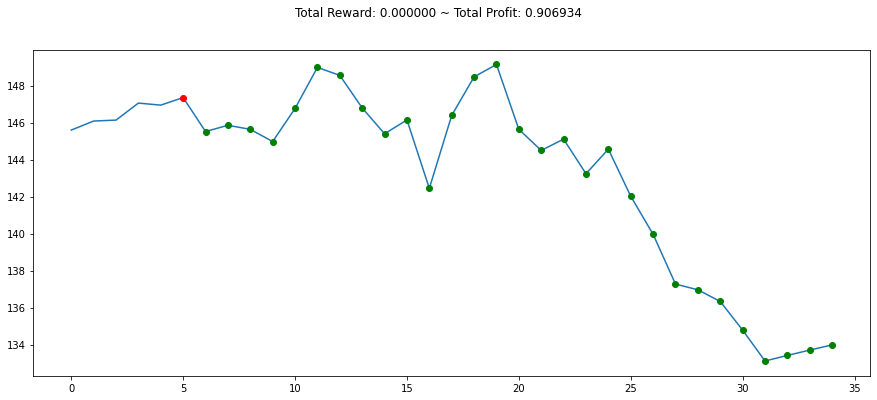

In [38]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# MSFT

In [8]:
microsoftdata.head()

,Date,Open,High,Low,Close,Volume
0,01/07/2022,314.15,316.50,310.09,314.04,"32,720,020"
1,01/06/2022,313.15,318.70,311.49,313.88,"39,646,152"
2,01/05/2022,325.86,326.07,315.98,316.38,"40,054,328"
3,01/04/2022,334.83,335.20,326.12,329.01,"32,674,311"
4,01/03/2022,335.35,338.00,329.78,334.75,"28,918,010"


In [33]:
microsoftdata['Date'] = pd.to_datetime(microsoftdata['Date'])
microsoftdata.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [34]:
microsoftdata.set_index('Date', inplace=True)
microsoftdata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-07,314.15,316.50,310.09,314.04,"32,720,020"
2022-01-06,313.15,318.70,311.49,313.88,"39,646,152"
2022-01-05,325.86,326.07,315.98,316.38,"40,054,328"
2022-01-04,334.83,335.20,326.12,329.01,"32,674,311"
2022-01-03,335.35,338.00,329.78,334.75,"28,918,010"


In [35]:
env_maker = lambda: gym.make('stocks-v0', df=microsoftdata, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [36]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

---------------------------------
| explained_variance | -163     |
| fps                | 25       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000348 |
---------------------------------
---------------------------------
| explained_variance | 0.00354  |
| fps                | 463      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 17.3     |
---------------------------------
---------------------------------
| explained_variance | 0.0584   |
| fps                | 546      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 2.92     |
---------------------------------
---------------------------------
| explained_variance | 0.00101  |
| fps                | 556      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

---------------------------------
| explained_variance | -0.816   |
| fps                | 548      |
| nupdates           | 3100     |
| policy_entropy     | 0.00143  |
| total_timesteps    | 15500    |
| value_loss         | 4.4e-10  |
---------------------------------
---------------------------------
| explained_variance | -0.573   |
| fps                | 549      |
| nupdates           | 3200     |
| policy_entropy     | 0.00147  |
| total_timesteps    | 16000    |
| value_loss         | 8.41e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.668   |
| fps                | 549      |
| nupdates           | 3300     |
| policy_entropy     | 0.00152  |
| total_timesteps    | 16500    |
| value_loss         | 1.89e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.792   |
| fps                | 551      |
| nupdates           | 3400     |
| policy_entropy     | 0.00156  |
| total_timest

---------------------------------
| explained_variance | -4.75    |
| fps                | 528      |
| nupdates           | 6200     |
| policy_entropy     | 0.00115  |
| total_timesteps    | 31000    |
| value_loss         | 4.4e-11  |
---------------------------------
---------------------------------
| explained_variance | -247     |
| fps                | 527      |
| nupdates           | 6300     |
| policy_entropy     | 0.00141  |
| total_timesteps    | 31500    |
| value_loss         | 7.42e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.726   |
| fps                | 527      |
| nupdates           | 6400     |
| policy_entropy     | 0.00121  |
| total_timesteps    | 32000    |
| value_loss         | 4.33e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.234   |
| fps                | 525      |
| nupdates           | 6500     |
| policy_entropy     | 0.00124  |
| total_timest

---------------------------------
| explained_variance | -0.737   |
| fps                | 534      |
| nupdates           | 9300     |
| policy_entropy     | 0.003    |
| total_timesteps    | 46500    |
| value_loss         | 1.45e-08 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 535      |
| nupdates           | 9400     |
| policy_entropy     | 0.00316  |
| total_timesteps    | 47000    |
| value_loss         | 2.55e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.405   |
| fps                | 535      |
| nupdates           | 9500     |
| policy_entropy     | 0.00333  |
| total_timesteps    | 47500    |
| value_loss         | 5.58e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.963   |
| fps                | 536      |
| nupdates           | 9600     |
| policy_entropy     | 0.00351  |
| total_timest

---------------------------------
| explained_variance | -0.602   |
| fps                | 524      |
| nupdates           | 12400    |
| policy_entropy     | 0.000448 |
| total_timesteps    | 62000    |
| value_loss         | 5.95e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.601   |
| fps                | 522      |
| nupdates           | 12500    |
| policy_entropy     | 0.000454 |
| total_timesteps    | 62500    |
| value_loss         | 8.19e-10 |
---------------------------------
---------------------------------
| explained_variance | -1.12    |
| fps                | 521      |
| nupdates           | 12600    |
| policy_entropy     | 0.000463 |
| total_timesteps    | 63000    |
| value_loss         | 2.09e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.915   |
| fps                | 520      |
| nupdates           | 12700    |
| policy_entropy     | 0.000468 |
| total_timest

---------------------------------
| explained_variance | -0.225   |
| fps                | 523      |
| nupdates           | 15500    |
| policy_entropy     | 0.000297 |
| total_timesteps    | 77500    |
| value_loss         | 2.02e-12 |
---------------------------------
---------------------------------
| explained_variance | 0.305    |
| fps                | 522      |
| nupdates           | 15600    |
| policy_entropy     | 0.0003   |
| total_timesteps    | 78000    |
| value_loss         | 7.62e-13 |
---------------------------------
---------------------------------
| explained_variance | -128     |
| fps                | 521      |
| nupdates           | 15700    |
| policy_entropy     | 0.000403 |
| total_timesteps    | 78500    |
| value_loss         | 5.05e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.146   |
| fps                | 522      |
| nupdates           | 15800    |
| policy_entropy     | 0.000308 |
| total_timest

---------------------------------
| explained_variance | 0.863    |
| fps                | 517      |
| nupdates           | 18600    |
| policy_entropy     | 0.000459 |
| total_timesteps    | 93000    |
| value_loss         | 3.8e-12  |
---------------------------------
---------------------------------
| explained_variance | -0.857   |
| fps                | 518      |
| nupdates           | 18700    |
| policy_entropy     | 0.000466 |
| total_timesteps    | 93500    |
| value_loss         | 7.12e-12 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 518      |
| nupdates           | 18800    |
| policy_entropy     | 0.000473 |
| total_timesteps    | 94000    |
| value_loss         | 4.34e-09 |
---------------------------------
---------------------------------
| explained_variance | -2.5     |
| fps                | 518      |
| nupdates           | 18900    |
| policy_entropy     | 0.000482 |
| total_timest

---------------------------------
| explained_variance | -2.39    |
| fps                | 524      |
| nupdates           | 21700    |
| policy_entropy     | 0.000125 |
| total_timesteps    | 108500   |
| value_loss         | 2.31e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.595   |
| fps                | 524      |
| nupdates           | 21800    |
| policy_entropy     | 0.000126 |
| total_timesteps    | 109000   |
| value_loss         | 1.92e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.601   |
| fps                | 524      |
| nupdates           | 21900    |
| policy_entropy     | 0.000127 |
| total_timesteps    | 109500   |
| value_loss         | 2.9e-11  |
---------------------------------
---------------------------------
| explained_variance | -0.862   |
| fps                | 524      |
| nupdates           | 22000    |
| policy_entropy     | 0.000129 |
| total_timest

---------------------------------
| explained_variance | -209     |
| fps                | 528      |
| nupdates           | 24800    |
| policy_entropy     | 0.000178 |
| total_timesteps    | 124000   |
| value_loss         | 1.99e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.714   |
| fps                | 528      |
| nupdates           | 24900    |
| policy_entropy     | 0.000169 |
| total_timesteps    | 124500   |
| value_loss         | 1.6e-10  |
---------------------------------
---------------------------------
| explained_variance | -4.19    |
| fps                | 528      |
| nupdates           | 25000    |
| policy_entropy     | 0.000171 |
| total_timesteps    | 125000   |
| value_loss         | 4.28e-11 |
---------------------------------
---------------------------------
| explained_variance | -160     |
| fps                | 528      |
| nupdates           | 25100    |
| policy_entropy     | 0.000242 |
| total_timest

---------------------------------
| explained_variance | -7.01    |
| fps                | 530      |
| nupdates           | 27900    |
| policy_entropy     | 0.0208   |
| total_timesteps    | 139500   |
| value_loss         | 2.44e-07 |
---------------------------------
---------------------------------
| explained_variance | -3.76    |
| fps                | 530      |
| nupdates           | 28000    |
| policy_entropy     | 0.000242 |
| total_timesteps    | 140000   |
| value_loss         | 8.75e-11 |
---------------------------------
---------------------------------
| explained_variance | -0.57    |
| fps                | 530      |
| nupdates           | 28100    |
| policy_entropy     | 0.000245 |
| total_timesteps    | 140500   |
| value_loss         | 6.41e-12 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 530      |
| nupdates           | 28200    |
| policy_entropy     | 0.000248 |
| total_timest

---------------------------------
| explained_variance | -0.645   |
| fps                | 532      |
| nupdates           | 31000    |
| policy_entropy     | 0.000148 |
| total_timesteps    | 155000   |
| value_loss         | 1.32e-10 |
---------------------------------
---------------------------------
| explained_variance | -2.29    |
| fps                | 532      |
| nupdates           | 31100    |
| policy_entropy     | 0.00015  |
| total_timesteps    | 155500   |
| value_loss         | 4.72e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.619   |
| fps                | 532      |
| nupdates           | 31200    |
| policy_entropy     | 0.000152 |
| total_timesteps    | 156000   |
| value_loss         | 3.76e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.607   |
| fps                | 533      |
| nupdates           | 31300    |
| policy_entropy     | 0.000153 |
| total_timest

---------------------------------
| explained_variance | -0.46    |
| fps                | 532      |
| nupdates           | 34100    |
| policy_entropy     | 0.000213 |
| total_timesteps    | 170500   |
| value_loss         | 1.25e-11 |
---------------------------------
---------------------------------
| explained_variance | -221     |
| fps                | 532      |
| nupdates           | 34200    |
| policy_entropy     | 0.000232 |
| total_timesteps    | 171000   |
| value_loss         | 8.55e-09 |
---------------------------------
---------------------------------
| explained_variance | -1.14    |
| fps                | 532      |
| nupdates           | 34300    |
| policy_entropy     | 0.000219 |
| total_timesteps    | 171500   |
| value_loss         | 8.56e-12 |
---------------------------------
---------------------------------
| explained_variance | -37.4    |
| fps                | 532      |
| nupdates           | 34400    |
| policy_entropy     | 0.000222 |
| total_timest

---------------------------------
| explained_variance | -91.6    |
| fps                | 532      |
| nupdates           | 37200    |
| policy_entropy     | 0.000336 |
| total_timesteps    | 186000   |
| value_loss         | 1.13e-10 |
---------------------------------
---------------------------------
| explained_variance | -461     |
| fps                | 532      |
| nupdates           | 37300    |
| policy_entropy     | 0.0269   |
| total_timesteps    | 186500   |
| value_loss         | 1.75e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.33     |
| fps                | 532      |
| nupdates           | 37400    |
| policy_entropy     | 0.000348 |
| total_timesteps    | 187000   |
| value_loss         | 1.27e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.762   |
| fps                | 532      |
| nupdates           | 37500    |
| policy_entropy     | 0.000354 |
| total_timest

---------------------------------
| explained_variance | -0.658   |
| fps                | 534      |
| nupdates           | 40300    |
| policy_entropy     | 0.000291 |
| total_timesteps    | 201500   |
| value_loss         | 5.16e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.661   |
| fps                | 534      |
| nupdates           | 40400    |
| policy_entropy     | 0.000296 |
| total_timesteps    | 202000   |
| value_loss         | 8.6e-09  |
---------------------------------
---------------------------------
| explained_variance | -0.52    |
| fps                | 534      |
| nupdates           | 40500    |
| policy_entropy     | 0.000302 |
| total_timesteps    | 202500   |
| value_loss         | 1.14e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.661   |
| fps                | 534      |
| nupdates           | 40600    |
| policy_entropy     | 0.000306 |
| total_timest

---------------------------------
| explained_variance | -0.873   |
| fps                | 536      |
| nupdates           | 43400    |
| policy_entropy     | 0.00149  |
| total_timesteps    | 217000   |
| value_loss         | 4.51e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.651   |
| fps                | 536      |
| nupdates           | 43500    |
| policy_entropy     | 0.00063  |
| total_timesteps    | 217500   |
| value_loss         | 2.24e-09 |
---------------------------------
---------------------------------
| explained_variance | -16.4    |
| fps                | 536      |
| nupdates           | 43600    |
| policy_entropy     | 0.000705 |
| total_timesteps    | 218000   |
| value_loss         | 7.54e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.711   |
| fps                | 536      |
| nupdates           | 43700    |
| policy_entropy     | 0.000666 |
| total_timest

---------------------------------
| explained_variance | 0.136    |
| fps                | 538      |
| nupdates           | 46500    |
| policy_entropy     | 0.000632 |
| total_timesteps    | 232500   |
| value_loss         | 5.08e-11 |
---------------------------------
---------------------------------
| explained_variance | -36      |
| fps                | 538      |
| nupdates           | 46600    |
| policy_entropy     | 0.00065  |
| total_timesteps    | 233000   |
| value_loss         | 1.27e-10 |
---------------------------------
---------------------------------
| explained_variance | -662     |
| fps                | 538      |
| nupdates           | 46700    |
| policy_entropy     | 0.0435   |
| total_timesteps    | 233500   |
| value_loss         | 1.91e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.301    |
| fps                | 538      |
| nupdates           | 46800    |
| policy_entropy     | 0.000692 |
| total_timest

---------------------------------
| explained_variance | 0.907    |
| fps                | 539      |
| nupdates           | 49600    |
| policy_entropy     | 0.000661 |
| total_timesteps    | 248000   |
| value_loss         | 2.95e-11 |
---------------------------------
---------------------------------
| explained_variance | -0.665   |
| fps                | 539      |
| nupdates           | 49700    |
| policy_entropy     | 0.000277 |
| total_timesteps    | 248500   |
| value_loss         | 1.99e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.674   |
| fps                | 539      |
| nupdates           | 49800    |
| policy_entropy     | 0.000283 |
| total_timesteps    | 249000   |
| value_loss         | 2.77e-09 |
---------------------------------
---------------------------------
| explained_variance | -28.3    |
| fps                | 539      |
| nupdates           | 49900    |
| policy_entropy     | 0.000744 |
| total_timest

---------------------------------
| explained_variance | -6.49    |
| fps                | 539      |
| nupdates           | 52700    |
| policy_entropy     | 0.000631 |
| total_timesteps    | 263500   |
| value_loss         | 3.94e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.689   |
| fps                | 539      |
| nupdates           | 52800    |
| policy_entropy     | 0.00062  |
| total_timesteps    | 264000   |
| value_loss         | 1.25e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.715   |
| fps                | 539      |
| nupdates           | 52900    |
| policy_entropy     | 0.000639 |
| total_timesteps    | 264500   |
| value_loss         | 3.49e-07 |
---------------------------------
---------------------------------
| explained_variance | -760     |
| fps                | 539      |
| nupdates           | 53000    |
| policy_entropy     | 0.000904 |
| total_timest

---------------------------------
| explained_variance | -75      |
| fps                | 540      |
| nupdates           | 55800    |
| policy_entropy     | 0.134    |
| total_timesteps    | 279000   |
| value_loss         | 8.91e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.506   |
| fps                | 540      |
| nupdates           | 55900    |
| policy_entropy     | 0.00125  |
| total_timesteps    | 279500   |
| value_loss         | 2.87e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.625   |
| fps                | 540      |
| nupdates           | 56000    |
| policy_entropy     | 0.00142  |
| total_timesteps    | 280000   |
| value_loss         | 7.36e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.495    |
| fps                | 540      |
| nupdates           | 56100    |
| policy_entropy     | 0.202    |
| total_timest

---------------------------------
| explained_variance | -0.668   |
| fps                | 539      |
| nupdates           | 58900    |
| policy_entropy     | 0.004    |
| total_timesteps    | 294500   |
| value_loss         | 5.08e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.489   |
| fps                | 539      |
| nupdates           | 59000    |
| policy_entropy     | 0.00667  |
| total_timesteps    | 295000   |
| value_loss         | 3.75e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.468   |
| fps                | 539      |
| nupdates           | 59100    |
| policy_entropy     | 0.000417 |
| total_timesteps    | 295500   |
| value_loss         | 3.34e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.509   |
| fps                | 539      |
| nupdates           | 59200    |
| policy_entropy     | 0.000487 |
| total_timest

---------------------------------
| explained_variance | -0.0356  |
| fps                | 540      |
| nupdates           | 62000    |
| policy_entropy     | 0.0053   |
| total_timesteps    | 310000   |
| value_loss         | 5.47e-08 |
---------------------------------
---------------------------------
| explained_variance | -1.5     |
| fps                | 540      |
| nupdates           | 62100    |
| policy_entropy     | 0.0243   |
| total_timesteps    | 310500   |
| value_loss         | 4.72e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0242  |
| fps                | 540      |
| nupdates           | 62200    |
| policy_entropy     | 0.026    |
| total_timesteps    | 311000   |
| value_loss         | 1.6e-06  |
---------------------------------
---------------------------------
| explained_variance | -0.637   |
| fps                | 540      |
| nupdates           | 62300    |
| policy_entropy     | 0.014    |
| total_timest

---------------------------------
| explained_variance | -0.407   |
| fps                | 540      |
| nupdates           | 65100    |
| policy_entropy     | 0.000713 |
| total_timesteps    | 325500   |
| value_loss         | 9.73e-09 |
---------------------------------
---------------------------------
| explained_variance | -84      |
| fps                | 540      |
| nupdates           | 65200    |
| policy_entropy     | 0.102    |
| total_timesteps    | 326000   |
| value_loss         | 2.54e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.448    |
| fps                | 540      |
| nupdates           | 65300    |
| policy_entropy     | 0.00443  |
| total_timesteps    | 326500   |
| value_loss         | 4.43e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.177   |
| fps                | 540      |
| nupdates           | 65400    |
| policy_entropy     | 0.000493 |
| total_timest

---------------------------------
| explained_variance | -0.544   |
| fps                | 541      |
| nupdates           | 68200    |
| policy_entropy     | 0.00021  |
| total_timesteps    | 341000   |
| value_loss         | 2.65e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.136   |
| fps                | 541      |
| nupdates           | 68300    |
| policy_entropy     | 0.000978 |
| total_timesteps    | 341500   |
| value_loss         | 2.8e-06  |
---------------------------------
---------------------------------
| explained_variance | -5.05    |
| fps                | 541      |
| nupdates           | 68400    |
| policy_entropy     | 0.00489  |
| total_timesteps    | 342000   |
| value_loss         | 5.83e-07 |
---------------------------------
---------------------------------
| explained_variance | 0.00141  |
| fps                | 541      |
| nupdates           | 68500    |
| policy_entropy     | 0.3      |
| total_timest

---------------------------------
| explained_variance | -0.00207 |
| fps                | 542      |
| nupdates           | 71300    |
| policy_entropy     | 2.13e-05 |
| total_timesteps    | 356500   |
| value_loss         | 2.57e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0148  |
| fps                | 542      |
| nupdates           | 71400    |
| policy_entropy     | 0.000179 |
| total_timesteps    | 357000   |
| value_loss         | 1.93e-05 |
---------------------------------
---------------------------------
| explained_variance | -12.2    |
| fps                | 542      |
| nupdates           | 71500    |
| policy_entropy     | 0.054    |
| total_timesteps    | 357500   |
| value_loss         | 0.000294 |
---------------------------------
---------------------------------
| explained_variance | 0.235    |
| fps                | 542      |
| nupdates           | 71600    |
| policy_entropy     | 0.0374   |
| total_timest

---------------------------------
| explained_variance | -0.0228  |
| fps                | 543      |
| nupdates           | 74400    |
| policy_entropy     | 8.9e-06  |
| total_timesteps    | 372000   |
| value_loss         | 4.18e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.146   |
| fps                | 543      |
| nupdates           | 74500    |
| policy_entropy     | 1.07e-05 |
| total_timesteps    | 372500   |
| value_loss         | 1.68e-09 |
---------------------------------
---------------------------------
| explained_variance | -315     |
| fps                | 543      |
| nupdates           | 74600    |
| policy_entropy     | 0.0152   |
| total_timesteps    | 373000   |
| value_loss         | 0.000409 |
---------------------------------
---------------------------------
| explained_variance | -110     |
| fps                | 543      |
| nupdates           | 74700    |
| policy_entropy     | 3.04e-05 |
| total_timest

---------------------------------
| explained_variance | -0.189   |
| fps                | 543      |
| nupdates           | 77500    |
| policy_entropy     | 0.00212  |
| total_timesteps    | 387500   |
| value_loss         | 0.000109 |
---------------------------------
---------------------------------
| explained_variance | -0.212   |
| fps                | 543      |
| nupdates           | 77600    |
| policy_entropy     | 0.00114  |
| total_timesteps    | 388000   |
| value_loss         | 7.23e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.235   |
| fps                | 543      |
| nupdates           | 77700    |
| policy_entropy     | 0.000754 |
| total_timesteps    | 388500   |
| value_loss         | 7.94e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.414   |
| fps                | 543      |
| nupdates           | 77800    |
| policy_entropy     | 0.00058  |
| total_timest

---------------------------------
| explained_variance | 0.00116  |
| fps                | 543      |
| nupdates           | 80600    |
| policy_entropy     | 1.39e-05 |
| total_timesteps    | 403000   |
| value_loss         | 7.05e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.176   |
| fps                | 543      |
| nupdates           | 80700    |
| policy_entropy     | 1.47e-05 |
| total_timesteps    | 403500   |
| value_loss         | 3.16e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.152   |
| fps                | 543      |
| nupdates           | 80800    |
| policy_entropy     | 9.39e-06 |
| total_timesteps    | 404000   |
| value_loss         | 1.42e-05 |
---------------------------------
---------------------------------
| explained_variance | -175     |
| fps                | 543      |
| nupdates           | 80900    |
| policy_entropy     | 1.03e-05 |
| total_timest

---------------------------------
| explained_variance | -3.8     |
| fps                | 544      |
| nupdates           | 83700    |
| policy_entropy     | 1.88e-06 |
| total_timesteps    | 418500   |
| value_loss         | 4.24e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0597  |
| fps                | 544      |
| nupdates           | 83800    |
| policy_entropy     | 1.7e-06  |
| total_timesteps    | 419000   |
| value_loss         | 1.23e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0582  |
| fps                | 544      |
| nupdates           | 83900    |
| policy_entropy     | 1.61e-06 |
| total_timesteps    | 419500   |
| value_loss         | 3.42e-06 |
---------------------------------
---------------------------------
| explained_variance | -217     |
| fps                | 544      |
| nupdates           | 84000    |
| policy_entropy     | 2.23e-06 |
| total_timest

---------------------------------
| explained_variance | 0.999    |
| fps                | 544      |
| nupdates           | 86800    |
| policy_entropy     | 0.0495   |
| total_timesteps    | 434000   |
| value_loss         | 0.00231  |
---------------------------------
---------------------------------
| explained_variance | -0.0518  |
| fps                | 544      |
| nupdates           | 86900    |
| policy_entropy     | 6.06e-07 |
| total_timesteps    | 434500   |
| value_loss         | 5.86e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0514  |
| fps                | 544      |
| nupdates           | 87000    |
| policy_entropy     | 5.95e-07 |
| total_timesteps    | 435000   |
| value_loss         | 9.91e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0457  |
| fps                | 544      |
| nupdates           | 87100    |
| policy_entropy     | 8.67e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0714  |
| fps                | 545      |
| nupdates           | 89900    |
| policy_entropy     | 6.98e-07 |
| total_timesteps    | 449500   |
| value_loss         | 2.41e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.127   |
| fps                | 545      |
| nupdates           | 90000    |
| policy_entropy     | 7.08e-07 |
| total_timesteps    | 450000   |
| value_loss         | 2.12e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0803  |
| fps                | 545      |
| nupdates           | 90100    |
| policy_entropy     | 7.12e-07 |
| total_timesteps    | 450500   |
| value_loss         | 2.64e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0744  |
| fps                | 545      |
| nupdates           | 90200    |
| policy_entropy     | 7.18e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0722  |
| fps                | 545      |
| nupdates           | 93000    |
| policy_entropy     | 4.21e-07 |
| total_timesteps    | 465000   |
| value_loss         | 4.95e-09 |
---------------------------------
---------------------------------
| explained_variance | -2.36    |
| fps                | 545      |
| nupdates           | 93100    |
| policy_entropy     | 4.42e-07 |
| total_timesteps    | 465500   |
| value_loss         | 2.66e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0798  |
| fps                | 545      |
| nupdates           | 93200    |
| policy_entropy     | 4.28e-07 |
| total_timesteps    | 466000   |
| value_loss         | 5.24e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.104   |
| fps                | 545      |
| nupdates           | 93300    |
| policy_entropy     | 4.31e-07 |
| total_timest

---------------------------------
| explained_variance | -0.103   |
| fps                | 546      |
| nupdates           | 96100    |
| policy_entropy     | 3.95e-07 |
| total_timesteps    | 480500   |
| value_loss         | 1.01e-08 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 546      |
| nupdates           | 96200    |
| policy_entropy     | 0.0239   |
| total_timesteps    | 481000   |
| value_loss         | 2.68e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.00759  |
| fps                | 546      |
| nupdates           | 96300    |
| policy_entropy     | 4.04e-07 |
| total_timesteps    | 481500   |
| value_loss         | 4.26e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0977  |
| fps                | 546      |
| nupdates           | 96400    |
| policy_entropy     | 4.09e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0867  |
| fps                | 546      |
| nupdates           | 99200    |
| policy_entropy     | 3.41e-07 |
| total_timesteps    | 496000   |
| value_loss         | 1.72e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0911  |
| fps                | 546      |
| nupdates           | 99300    |
| policy_entropy     | 3.43e-07 |
| total_timesteps    | 496500   |
| value_loss         | 1.65e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.676    |
| fps                | 546      |
| nupdates           | 99400    |
| policy_entropy     | 3.47e-07 |
| total_timesteps    | 497000   |
| value_loss         | 1.64e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0323  |
| fps                | 546      |
| nupdates           | 99500    |
| policy_entropy     | 3.49e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0889  |
| fps                | 547      |
| nupdates           | 102300   |
| policy_entropy     | 2.75e-07 |
| total_timesteps    | 511500   |
| value_loss         | 1e-07    |
---------------------------------
---------------------------------
| explained_variance | -0.0891  |
| fps                | 547      |
| nupdates           | 102400   |
| policy_entropy     | 2.76e-07 |
| total_timesteps    | 512000   |
| value_loss         | 1.57e-08 |
---------------------------------
---------------------------------
| explained_variance | -57.9    |
| fps                | 547      |
| nupdates           | 102500   |
| policy_entropy     | 2.88e-07 |
| total_timesteps    | 512500   |
| value_loss         | 4.21e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0874  |
| fps                | 547      |
| nupdates           | 102600   |
| policy_entropy     | 2.8e-07  |
| total_timest

---------------------------------
| explained_variance | -0.0923  |
| fps                | 547      |
| nupdates           | 105400   |
| policy_entropy     | 3.01e-07 |
| total_timesteps    | 527000   |
| value_loss         | 9.44e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0339  |
| fps                | 547      |
| nupdates           | 105500   |
| policy_entropy     | 3.06e-07 |
| total_timesteps    | 527500   |
| value_loss         | 1.02e-09 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 547      |
| nupdates           | 105600   |
| policy_entropy     | 0.026    |
| total_timesteps    | 528000   |
| value_loss         | 5.71e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.145   |
| fps                | 548      |
| nupdates           | 105700   |
| policy_entropy     | 3.2e-07  |
| total_timest

---------------------------------
| explained_variance | 0.0264   |
| fps                | 548      |
| nupdates           | 108500   |
| policy_entropy     | 1.91e-07 |
| total_timesteps    | 542500   |
| value_loss         | 1.56e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0783  |
| fps                | 548      |
| nupdates           | 108600   |
| policy_entropy     | 1.92e-07 |
| total_timesteps    | 543000   |
| value_loss         | 1.81e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0792  |
| fps                | 548      |
| nupdates           | 108700   |
| policy_entropy     | 1.92e-07 |
| total_timesteps    | 543500   |
| value_loss         | 1.65e-09 |
---------------------------------
---------------------------------
| explained_variance | 0.486    |
| fps                | 548      |
| nupdates           | 108800   |
| policy_entropy     | 1.93e-07 |
| total_timest

---------------------------------
| explained_variance | -8.14    |
| fps                | 548      |
| nupdates           | 111600   |
| policy_entropy     | 1.3e-07  |
| total_timesteps    | 558000   |
| value_loss         | 6.44e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0727  |
| fps                | 548      |
| nupdates           | 111700   |
| policy_entropy     | 1.29e-07 |
| total_timesteps    | 558500   |
| value_loss         | 5.52e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0785  |
| fps                | 548      |
| nupdates           | 111800   |
| policy_entropy     | 1.29e-07 |
| total_timesteps    | 559000   |
| value_loss         | 5.99e-10 |
---------------------------------
---------------------------------
| explained_variance | -103     |
| fps                | 548      |
| nupdates           | 111900   |
| policy_entropy     | 1.34e-07 |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 549      |
| nupdates           | 114700   |
| policy_entropy     | 0.00168  |
| total_timesteps    | 573500   |
| value_loss         | 1.09e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0572  |
| fps                | 549      |
| nupdates           | 114800   |
| policy_entropy     | 1.28e-07 |
| total_timesteps    | 574000   |
| value_loss         | 6.52e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0608  |
| fps                | 549      |
| nupdates           | 114900   |
| policy_entropy     | 1.6e-07  |
| total_timesteps    | 574500   |
| value_loss         | 8.48e-06 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 549      |
| nupdates           | 115000   |
| policy_entropy     | 0.00924  |
| total_timest

---------------------------------
| explained_variance | -0.0872  |
| fps                | 549      |
| nupdates           | 117800   |
| policy_entropy     | 1.67e-07 |
| total_timesteps    | 589000   |
| value_loss         | 4.28e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.309    |
| fps                | 550      |
| nupdates           | 117900   |
| policy_entropy     | 1.67e-07 |
| total_timesteps    | 589500   |
| value_loss         | 6.08e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0754  |
| fps                | 550      |
| nupdates           | 118000   |
| policy_entropy     | 1.67e-07 |
| total_timesteps    | 590000   |
| value_loss         | 1.06e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0966  |
| fps                | 550      |
| nupdates           | 118100   |
| policy_entropy     | 1.68e-07 |
| total_timest

---------------------------------
| explained_variance | -0.0883  |
| fps                | 550      |
| nupdates           | 120900   |
| policy_entropy     | 1.81e-07 |
| total_timesteps    | 604500   |
| value_loss         | 7.11e-10 |
---------------------------------
---------------------------------
| explained_variance | -53.1    |
| fps                | 550      |
| nupdates           | 121000   |
| policy_entropy     | 1.82e-07 |
| total_timesteps    | 605000   |
| value_loss         | 1.36e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0774  |
| fps                | 550      |
| nupdates           | 121100   |
| policy_entropy     | 1.82e-07 |
| total_timesteps    | 605500   |
| value_loss         | 3.74e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0942  |
| fps                | 550      |
| nupdates           | 121200   |
| policy_entropy     | 1.83e-07 |
| total_timest

---------------------------------
| explained_variance | -0.00342 |
| fps                | 550      |
| nupdates           | 124000   |
| policy_entropy     | 6.54e-08 |
| total_timesteps    | 620000   |
| value_loss         | 3.59e-10 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 550      |
| nupdates           | 124100   |
| policy_entropy     | 0.000519 |
| total_timesteps    | 620500   |
| value_loss         | 2.28e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0706  |
| fps                | 550      |
| nupdates           | 124200   |
| policy_entropy     | 6.5e-08  |
| total_timesteps    | 621000   |
| value_loss         | 7.95e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0931  |
| fps                | 550      |
| nupdates           | 124300   |
| policy_entropy     | 6.49e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0787  |
| fps                | 551      |
| nupdates           | 127100   |
| policy_entropy     | 5.08e-08 |
| total_timesteps    | 635500   |
| value_loss         | 6.16e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.08    |
| fps                | 551      |
| nupdates           | 127200   |
| policy_entropy     | 5.08e-08 |
| total_timesteps    | 636000   |
| value_loss         | 4.14e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.00789 |
| fps                | 551      |
| nupdates           | 127300   |
| policy_entropy     | 5.06e-08 |
| total_timesteps    | 636500   |
| value_loss         | 3.05e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.075   |
| fps                | 551      |
| nupdates           | 127400   |
| policy_entropy     | 5.06e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0714  |
| fps                | 551      |
| nupdates           | 130200   |
| policy_entropy     | 5.3e-08  |
| total_timesteps    | 651000   |
| value_loss         | 1.58e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0687  |
| fps                | 551      |
| nupdates           | 130300   |
| policy_entropy     | 5.31e-08 |
| total_timesteps    | 651500   |
| value_loss         | 1.45e-09 |
---------------------------------
---------------------------------
| explained_variance | -25.2    |
| fps                | 551      |
| nupdates           | 130400   |
| policy_entropy     | 5.34e-08 |
| total_timesteps    | 652000   |
| value_loss         | 1.98e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.00257 |
| fps                | 551      |
| nupdates           | 130500   |
| policy_entropy     | 5.31e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0816  |
| fps                | 552      |
| nupdates           | 133300   |
| policy_entropy     | 7.39e-08 |
| total_timesteps    | 666500   |
| value_loss         | 1.71e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.119   |
| fps                | 552      |
| nupdates           | 133400   |
| policy_entropy     | 7.42e-08 |
| total_timesteps    | 667000   |
| value_loss         | 1.85e-09 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 552      |
| nupdates           | 133500   |
| policy_entropy     | 0.00629  |
| total_timesteps    | 667500   |
| value_loss         | 1.45e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0452  |
| fps                | 552      |
| nupdates           | 133600   |
| policy_entropy     | 7.49e-08 |
| total_timest

---------------------------------
| explained_variance | 0.0468   |
| fps                | 552      |
| nupdates           | 136400   |
| policy_entropy     | 7.5e-08  |
| total_timesteps    | 682000   |
| value_loss         | 6.9e-09  |
---------------------------------
---------------------------------
| explained_variance | -0.0822  |
| fps                | 552      |
| nupdates           | 136500   |
| policy_entropy     | 7.57e-08 |
| total_timesteps    | 682500   |
| value_loss         | 9.98e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.0769  |
| fps                | 552      |
| nupdates           | 136600   |
| policy_entropy     | 7.63e-08 |
| total_timesteps    | 683000   |
| value_loss         | 2.96e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.415    |
| fps                | 552      |
| nupdates           | 136700   |
| policy_entropy     | 7.7e-08  |
| total_timest

---------------------------------
| explained_variance | 0.933    |
| fps                | 551      |
| nupdates           | 139500   |
| policy_entropy     | 7.14e-08 |
| total_timesteps    | 697500   |
| value_loss         | 8.74e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0854  |
| fps                | 551      |
| nupdates           | 139600   |
| policy_entropy     | 4.95e-08 |
| total_timesteps    | 698000   |
| value_loss         | 2.28e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0903  |
| fps                | 551      |
| nupdates           | 139700   |
| policy_entropy     | 4.82e-08 |
| total_timesteps    | 698500   |
| value_loss         | 1.03e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.776    |
| fps                | 551      |
| nupdates           | 139800   |
| policy_entropy     | 4.84e-08 |
| total_timest

---------------------------------
| explained_variance | -13.5    |
| fps                | 551      |
| nupdates           | 142600   |
| policy_entropy     | 5.59e-08 |
| total_timesteps    | 713000   |
| value_loss         | 6.28e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0894  |
| fps                | 551      |
| nupdates           | 142700   |
| policy_entropy     | 5.03e-08 |
| total_timesteps    | 713500   |
| value_loss         | 1.12e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.237   |
| fps                | 551      |
| nupdates           | 142800   |
| policy_entropy     | 5.03e-08 |
| total_timesteps    | 714000   |
| value_loss         | 1.5e-10  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 551      |
| nupdates           | 142900   |
| policy_entropy     | 0.00192  |
| total_timest

---------------------------------
| explained_variance | nan      |
| fps                | 552      |
| nupdates           | 145700   |
| policy_entropy     | 3.11e-08 |
| total_timesteps    | 728500   |
| value_loss         | 1.51e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.172   |
| fps                | 552      |
| nupdates           | 145800   |
| policy_entropy     | 3.11e-08 |
| total_timesteps    | 729000   |
| value_loss         | 9.16e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0733  |
| fps                | 552      |
| nupdates           | 145900   |
| policy_entropy     | 3.11e-08 |
| total_timesteps    | 729500   |
| value_loss         | 9.21e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.0761  |
| fps                | 552      |
| nupdates           | 146000   |
| policy_entropy     | 3.11e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0772  |
| fps                | 553      |
| nupdates           | 148800   |
| policy_entropy     | 1.97e-08 |
| total_timesteps    | 744000   |
| value_loss         | 2.2e-08  |
---------------------------------
---------------------------------
| explained_variance | 0.533    |
| fps                | 553      |
| nupdates           | 148900   |
| policy_entropy     | 1.97e-08 |
| total_timesteps    | 744500   |
| value_loss         | 8.67e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0804  |
| fps                | 553      |
| nupdates           | 149000   |
| policy_entropy     | 1.97e-08 |
| total_timesteps    | 745000   |
| value_loss         | 1.24e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0764  |
| fps                | 553      |
| nupdates           | 149100   |
| policy_entropy     | 1.96e-08 |
| total_timest

---------------------------------
| explained_variance | -0.078   |
| fps                | 550      |
| nupdates           | 151900   |
| policy_entropy     | 1.89e-08 |
| total_timesteps    | 759500   |
| value_loss         | 6.48e-09 |
---------------------------------
---------------------------------
| explained_variance | -3.77    |
| fps                | 550      |
| nupdates           | 152000   |
| policy_entropy     | 2.09e-08 |
| total_timesteps    | 760000   |
| value_loss         | 2.03e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0752  |
| fps                | 550      |
| nupdates           | 152100   |
| policy_entropy     | 1.88e-08 |
| total_timesteps    | 760500   |
| value_loss         | 5.74e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.139   |
| fps                | 550      |
| nupdates           | 152200   |
| policy_entropy     | 1.88e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0706  |
| fps                | 549      |
| nupdates           | 155000   |
| policy_entropy     | 1.84e-08 |
| total_timesteps    | 775000   |
| value_loss         | 1.11e-08 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 549      |
| nupdates           | 155100   |
| policy_entropy     | 1.84e-08 |
| total_timesteps    | 775500   |
| value_loss         | 1.02e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.122   |
| fps                | 549      |
| nupdates           | 155200   |
| policy_entropy     | 1.84e-08 |
| total_timesteps    | 776000   |
| value_loss         | 2.13e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0718  |
| fps                | 549      |
| nupdates           | 155300   |
| policy_entropy     | 1.83e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0714  |
| fps                | 548      |
| nupdates           | 158100   |
| policy_entropy     | 2.28e-08 |
| total_timesteps    | 790500   |
| value_loss         | 2.02e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0723  |
| fps                | 548      |
| nupdates           | 158200   |
| policy_entropy     | 2.28e-08 |
| total_timesteps    | 791000   |
| value_loss         | 2.1e-09  |
---------------------------------
---------------------------------
| explained_variance | -1.2     |
| fps                | 548      |
| nupdates           | 158300   |
| policy_entropy     | 2.28e-08 |
| total_timesteps    | 791500   |
| value_loss         | 1.04e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0698  |
| fps                | 548      |
| nupdates           | 158400   |
| policy_entropy     | 2.28e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0723  |
| fps                | 548      |
| nupdates           | 161200   |
| policy_entropy     | 2.24e-08 |
| total_timesteps    | 806000   |
| value_loss         | 5.03e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0842  |
| fps                | 548      |
| nupdates           | 161300   |
| policy_entropy     | 2.24e-08 |
| total_timesteps    | 806500   |
| value_loss         | 5.19e-09 |
---------------------------------
---------------------------------
| explained_variance | -4.03    |
| fps                | 548      |
| nupdates           | 161400   |
| policy_entropy     | 2.49e-08 |
| total_timesteps    | 807000   |
| value_loss         | 2.81e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0777  |
| fps                | 548      |
| nupdates           | 161500   |
| policy_entropy     | 2.23e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0644  |
| fps                | 549      |
| nupdates           | 164300   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 821500   |
| value_loss         | 1.03e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0738  |
| fps                | 549      |
| nupdates           | 164400   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 822000   |
| value_loss         | 1.07e-08 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 549      |
| nupdates           | 164500   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 822500   |
| value_loss         | 9.87e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.138   |
| fps                | 549      |
| nupdates           | 164600   |
| policy_entropy     | 2.25e-08 |
| total_timest

---------------------------------
| explained_variance | 0.636    |
| fps                | 550      |
| nupdates           | 167400   |
| policy_entropy     | 2.79e-08 |
| total_timesteps    | 837000   |
| value_loss         | 1.99e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0676  |
| fps                | 550      |
| nupdates           | 167500   |
| policy_entropy     | 3.48e-08 |
| total_timesteps    | 837500   |
| value_loss         | 1.89e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0796  |
| fps                | 550      |
| nupdates           | 167600   |
| policy_entropy     | 3.5e-08  |
| total_timesteps    | 838000   |
| value_loss         | 3.46e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.356   |
| fps                | 550      |
| nupdates           | 167700   |
| policy_entropy     | 3.52e-08 |
| total_timest

---------------------------------
| explained_variance | -7.23    |
| fps                | 550      |
| nupdates           | 170500   |
| policy_entropy     | 3.92e-08 |
| total_timesteps    | 852500   |
| value_loss         | 2.99e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0783  |
| fps                | 550      |
| nupdates           | 170600   |
| policy_entropy     | 3.88e-08 |
| total_timesteps    | 853000   |
| value_loss         | 2.86e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0937  |
| fps                | 550      |
| nupdates           | 170700   |
| policy_entropy     | 3.89e-08 |
| total_timesteps    | 853500   |
| value_loss         | 3.06e-09 |
---------------------------------
---------------------------------
| explained_variance | -6.76    |
| fps                | 550      |
| nupdates           | 170800   |
| policy_entropy     | 4.4e-08  |
| total_timest

---------------------------------
| explained_variance | 1        |
| fps                | 551      |
| nupdates           | 173600   |
| policy_entropy     | 0.00911  |
| total_timesteps    | 868000   |
| value_loss         | 5.8e-06  |
---------------------------------
---------------------------------
| explained_variance | -0.071   |
| fps                | 551      |
| nupdates           | 173700   |
| policy_entropy     | 4.57e-08 |
| total_timesteps    | 868500   |
| value_loss         | 7.7e-08  |
---------------------------------
---------------------------------
| explained_variance | -0.0831  |
| fps                | 551      |
| nupdates           | 173800   |
| policy_entropy     | 4.61e-08 |
| total_timesteps    | 869000   |
| value_loss         | 8.01e-09 |
---------------------------------
---------------------------------
| explained_variance | nan      |
| fps                | 551      |
| nupdates           | 173900   |
| policy_entropy     | 4.64e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0839  |
| fps                | 551      |
| nupdates           | 176700   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 883500   |
| value_loss         | 3.57e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.00478 |
| fps                | 551      |
| nupdates           | 176800   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 884000   |
| value_loss         | 1.27e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.0796  |
| fps                | 551      |
| nupdates           | 176900   |
| policy_entropy     | 2.26e-08 |
| total_timesteps    | 884500   |
| value_loss         | 1.19e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0776  |
| fps                | 551      |
| nupdates           | 177000   |
| policy_entropy     | 2.26e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0892  |
| fps                | 551      |
| nupdates           | 179800   |
| policy_entropy     | 2.28e-08 |
| total_timesteps    | 899000   |
| value_loss         | 4.04e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.572    |
| fps                | 551      |
| nupdates           | 179900   |
| policy_entropy     | 2.31e-08 |
| total_timesteps    | 899500   |
| value_loss         | 3.27e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0751  |
| fps                | 551      |
| nupdates           | 180000   |
| policy_entropy     | 2.28e-08 |
| total_timesteps    | 900000   |
| value_loss         | 7.38e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0851  |
| fps                | 551      |
| nupdates           | 180100   |
| policy_entropy     | 2.29e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0738  |
| fps                | 552      |
| nupdates           | 182900   |
| policy_entropy     | 2.36e-08 |
| total_timesteps    | 914500   |
| value_loss         | 9.95e-10 |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 552      |
| nupdates           | 183000   |
| policy_entropy     | 0.00264  |
| total_timesteps    | 915000   |
| value_loss         | 2.34e-05 |
---------------------------------
---------------------------------
| explained_variance | -0.0652  |
| fps                | 552      |
| nupdates           | 183100   |
| policy_entropy     | 2.37e-08 |
| total_timesteps    | 915500   |
| value_loss         | 1.09e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0752  |
| fps                | 552      |
| nupdates           | 183200   |
| policy_entropy     | 2.37e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0727  |
| fps                | 554      |
| nupdates           | 186000   |
| policy_entropy     | 2.39e-08 |
| total_timesteps    | 930000   |
| value_loss         | 1.51e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0737  |
| fps                | 554      |
| nupdates           | 186100   |
| policy_entropy     | 2.4e-08  |
| total_timesteps    | 930500   |
| value_loss         | 1.51e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.0618   |
| fps                | 554      |
| nupdates           | 186200   |
| policy_entropy     | 2.4e-08  |
| total_timesteps    | 931000   |
| value_loss         | 2.02e-07 |
---------------------------------
---------------------------------
| explained_variance | -0.0722  |
| fps                | 554      |
| nupdates           | 186300   |
| policy_entropy     | 2.4e-08  |
| total_timest

---------------------------------
| explained_variance | -0.105   |
| fps                | 555      |
| nupdates           | 189100   |
| policy_entropy     | 2.04e-08 |
| total_timesteps    | 945500   |
| value_loss         | 5.23e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.07    |
| fps                | 555      |
| nupdates           | 189200   |
| policy_entropy     | 2.04e-08 |
| total_timesteps    | 946000   |
| value_loss         | 4.91e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.449    |
| fps                | 555      |
| nupdates           | 189300   |
| policy_entropy     | 2.06e-08 |
| total_timesteps    | 946500   |
| value_loss         | 3.78e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0742  |
| fps                | 556      |
| nupdates           | 189400   |
| policy_entropy     | 2.04e-08 |
| total_timest

---------------------------------
| explained_variance | -0.0664  |
| fps                | 557      |
| nupdates           | 192200   |
| policy_entropy     | 2.06e-08 |
| total_timesteps    | 961000   |
| value_loss         | 7.93e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0779  |
| fps                | 557      |
| nupdates           | 192300   |
| policy_entropy     | 2.06e-08 |
| total_timesteps    | 961500   |
| value_loss         | 8.3e-10  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 557      |
| nupdates           | 192400   |
| policy_entropy     | 0.00221  |
| total_timesteps    | 962000   |
| value_loss         | 2e-05    |
---------------------------------
---------------------------------
| explained_variance | -0.067   |
| fps                | 557      |
| nupdates           | 192500   |
| policy_entropy     | 2.06e-08 |
| total_timest

---------------------------------
| explained_variance | 0.0516   |
| fps                | 559      |
| nupdates           | 195300   |
| policy_entropy     | 2.09e-08 |
| total_timesteps    | 976500   |
| value_loss         | 1.54e-08 |
---------------------------------
---------------------------------
| explained_variance | -0.0647  |
| fps                | 559      |
| nupdates           | 195400   |
| policy_entropy     | 2.09e-08 |
| total_timesteps    | 977000   |
| value_loss         | 1.73e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0801  |
| fps                | 559      |
| nupdates           | 195500   |
| policy_entropy     | 2.09e-08 |
| total_timesteps    | 977500   |
| value_loss         | 1.72e-10 |
---------------------------------
---------------------------------
| explained_variance | 0.0574   |
| fps                | 559      |
| nupdates           | 195600   |
| policy_entropy     | 2.09e-08 |
| total_timest

---------------------------------
| explained_variance | 0.957    |
| fps                | 561      |
| nupdates           | 198400   |
| policy_entropy     | 2.75e-08 |
| total_timesteps    | 992000   |
| value_loss         | 6.28e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0998  |
| fps                | 561      |
| nupdates           | 198500   |
| policy_entropy     | 2.75e-08 |
| total_timesteps    | 992500   |
| value_loss         | 9.48e-09 |
---------------------------------
---------------------------------
| explained_variance | -0.0835  |
| fps                | 561      |
| nupdates           | 198600   |
| policy_entropy     | 2.76e-08 |
| total_timesteps    | 993000   |
| value_loss         | 9.61e-10 |
---------------------------------
---------------------------------
| explained_variance | -0.809   |
| fps                | 561      |
| nupdates           | 198700   |
| policy_entropy     | 3.47e-08 |
| total_timest

In [39]:
env = gym.make('stocks-v0', df=microsoftdata, frame_bound=(110,140), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.9182663629660838, 'position': 1}


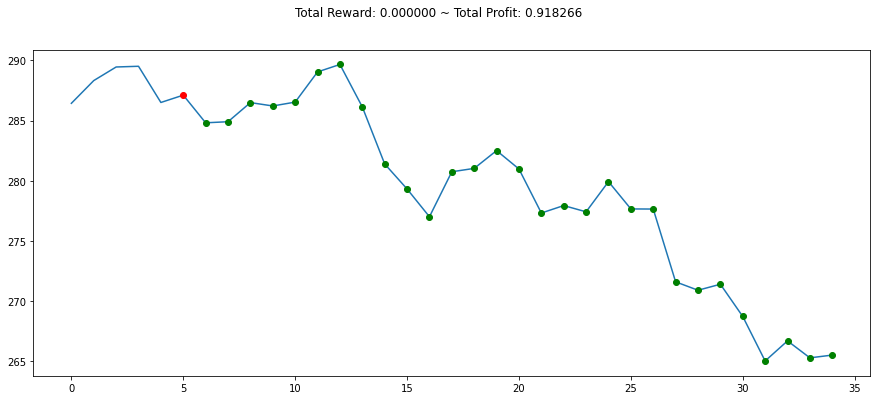

In [40]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()